In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [18]:
# font 설정.
plt.rcParams.update({'font.family':'Arial'})

In [23]:
def draw_boxplot(result_list, title):
    filename = title + '.png'
    
    plt.rcParams['figure.figsize'] = [20, 15]
    xlabel = ['IS score 1', 'IS score 2', 'IS score 3', 'ES score 1', 'ES score 2', 'ES score 3']

    plt.boxplot(result_list, showfliers=True)
    plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.yticks(fontsize=20)
    # plt.ylabel('Vote', fontsize=24)
    plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

In [77]:
def draw_boxplot_for_hub(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize):
    filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list, showfliers=False, boxprops= dict(linewidth=10, color='black', facecolor="red"),
               whiskerprops=dict(linestyle='-',linewidth=10, color='black'),
               capprops=dict(linewidth=10), medianprops=dict(linewidth=10))
    
    # plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    # plt.ylabel(ylabel, fontsize=40)
    plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    plt.savefig(f"/home/mykim/source/plotting-and-graph-analysis/eps/{filename}", format='eps', bbox_inches='tight')
    
    plt.show()

In [4]:
connection = cn.make_connection('connection.csv')

cursors3 = []
sqls3 = []
results3 = []
result_list3 = []
for i in range(6):
    cursors3.append(connection.cursor(pymysql.cursors.DictCursor))

where = "is_valid=1 and is_valid_author=1;"

sqls3.append("select score from comments where is_score = 1 and " + where)
sqls3.append("select score from comments where is_score = 2 and " + where)
sqls3.append("select score from comments where is_score = 3 and " + where)
sqls3.append("select score from comments where es_score = 1 and " + where)
sqls3.append("select score from comments where es_score = 2 and " + where)
sqls3.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors3[i].execute(sqls3[i])
    # result가 dict 형태로 return.
    results3.append(cursors3[i].fetchall())

connection.close()

for i in range(6):
    results3[i] = pd.DataFrame(results3[i])
    result_list3.append(list(np.array(results3[i]['score'].tolist())))

In [229]:
result_list3[3]

[1,
 2,
 5,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 30,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 0,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 8,
 1,
 2,
 3,
 21,
 4,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 0,
 1,
 9,
 2,
 1,
 17,
 1,
 34,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 5,
 105,
 1,
 1,
 1,
 1,
 1,
 2,
 43,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 2,
 2,
 -19,
 1,
 1,
 1,
 2,
 3,
 3,
 4,
 40,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 2,
 1,
 22,
 1,
 1,
 1,
 0,
 2,
 2,
 8,
 13,
 1,
 5,
 13,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 6,
 1,
 2,
 -2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 7,
 1,
 1,
 1,
 2,
 1,
 9,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 7,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 

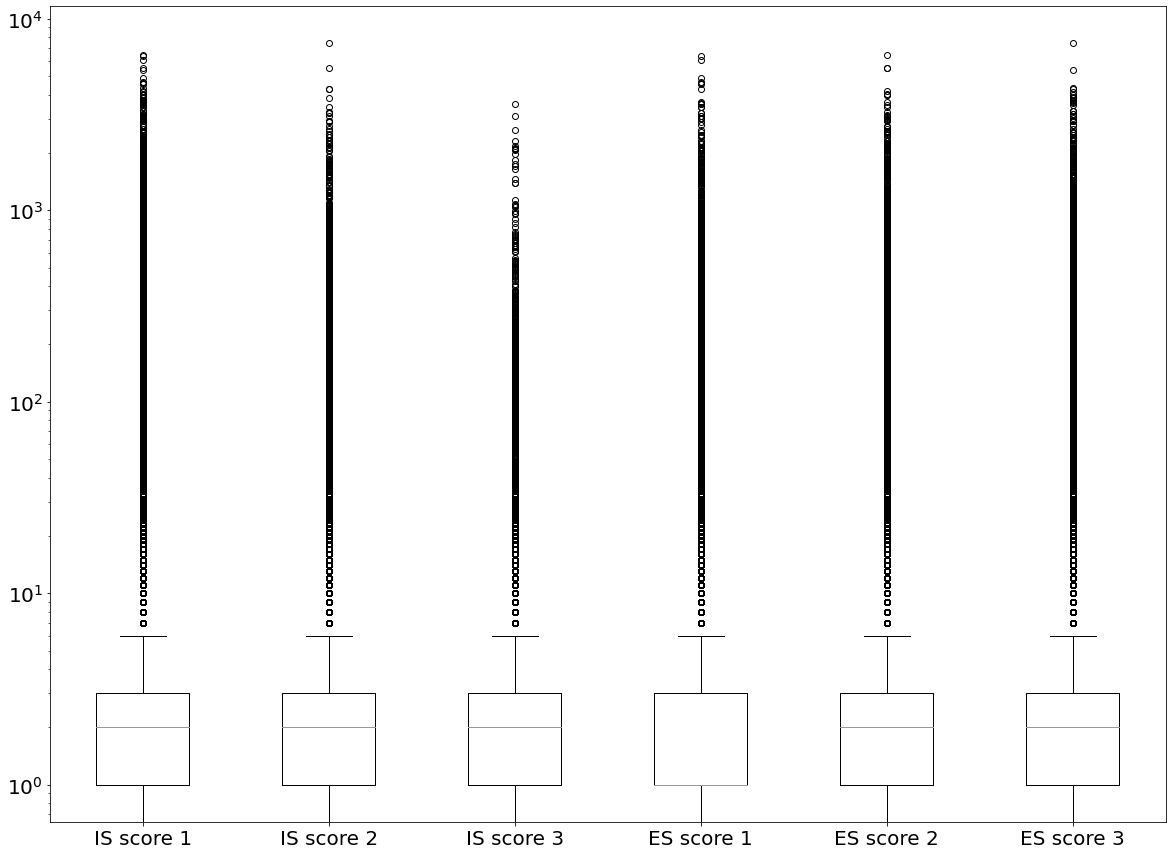

In [5]:
draw_boxplot(result_list3, "boxplot_support_score_vote")

In [202]:
connection = cn.make_connection('connection.csv')

cursors3 = []
sqls3 = []
results3 = []
result_list3 = []
for i in range(6):
    cursors3.append(connection.cursor(pymysql.cursors.DictCursor))

sqls3.append("select score from comments where is_score = 1 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where is_score = 2 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where is_score = 3 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 1 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 2 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 3 and is_valid_author=1 and is_valid=1;")

for i in range(6):
    cursors3[i].execute(sqls3[i])
    # result가 dict 형태로 return.
    results3.append(cursors3[i].fetchall())

connection.close()

for i in range(6):
    results3[i] = pd.DataFrame(results3[i])
    result_list3.append(list(np.array(results3[i]['score'].tolist())))

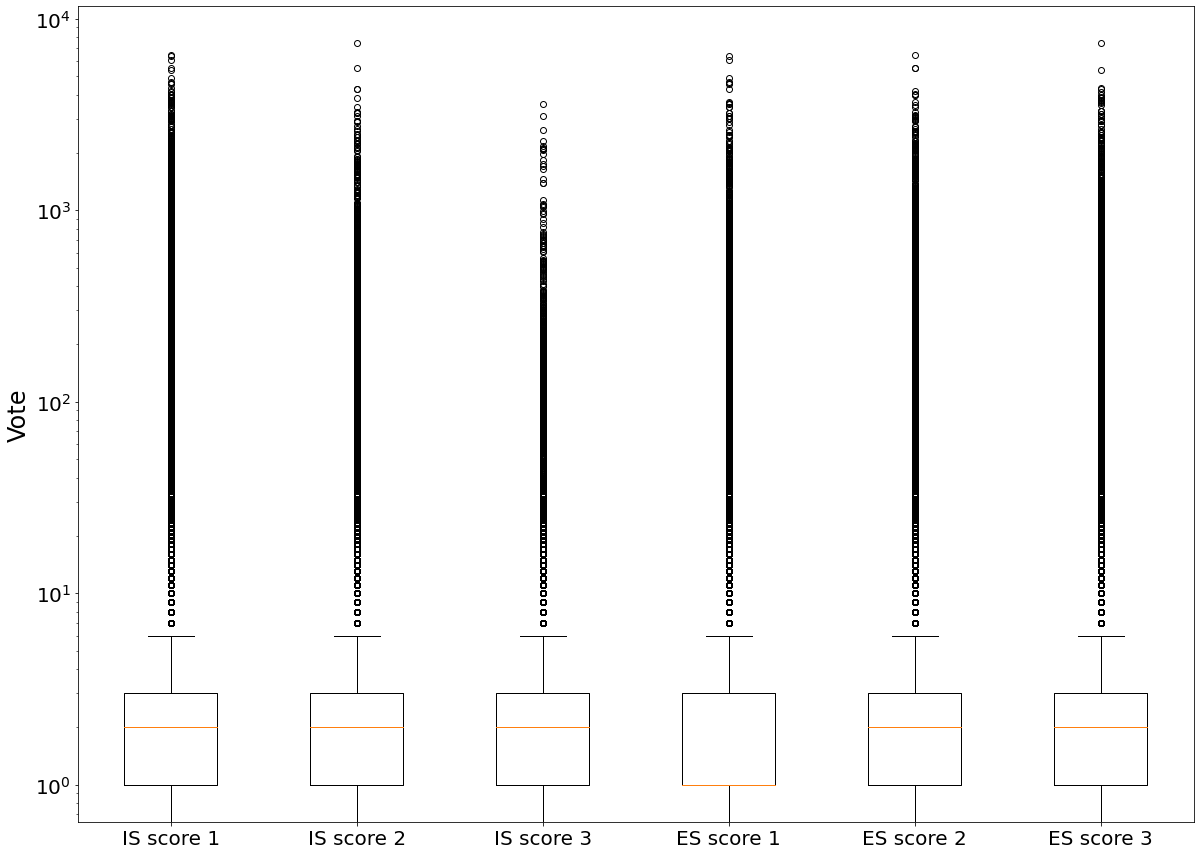

In [207]:
draw_boxplot(result_list3, "boxplot_support_score_vote")

# Hub analysis for paper

In [106]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree <= 1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 1;')
sqls.append('select outdegree from nodes where top_k_outdegree <= 10;')
sqls.append('select outdegree from nodes where top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

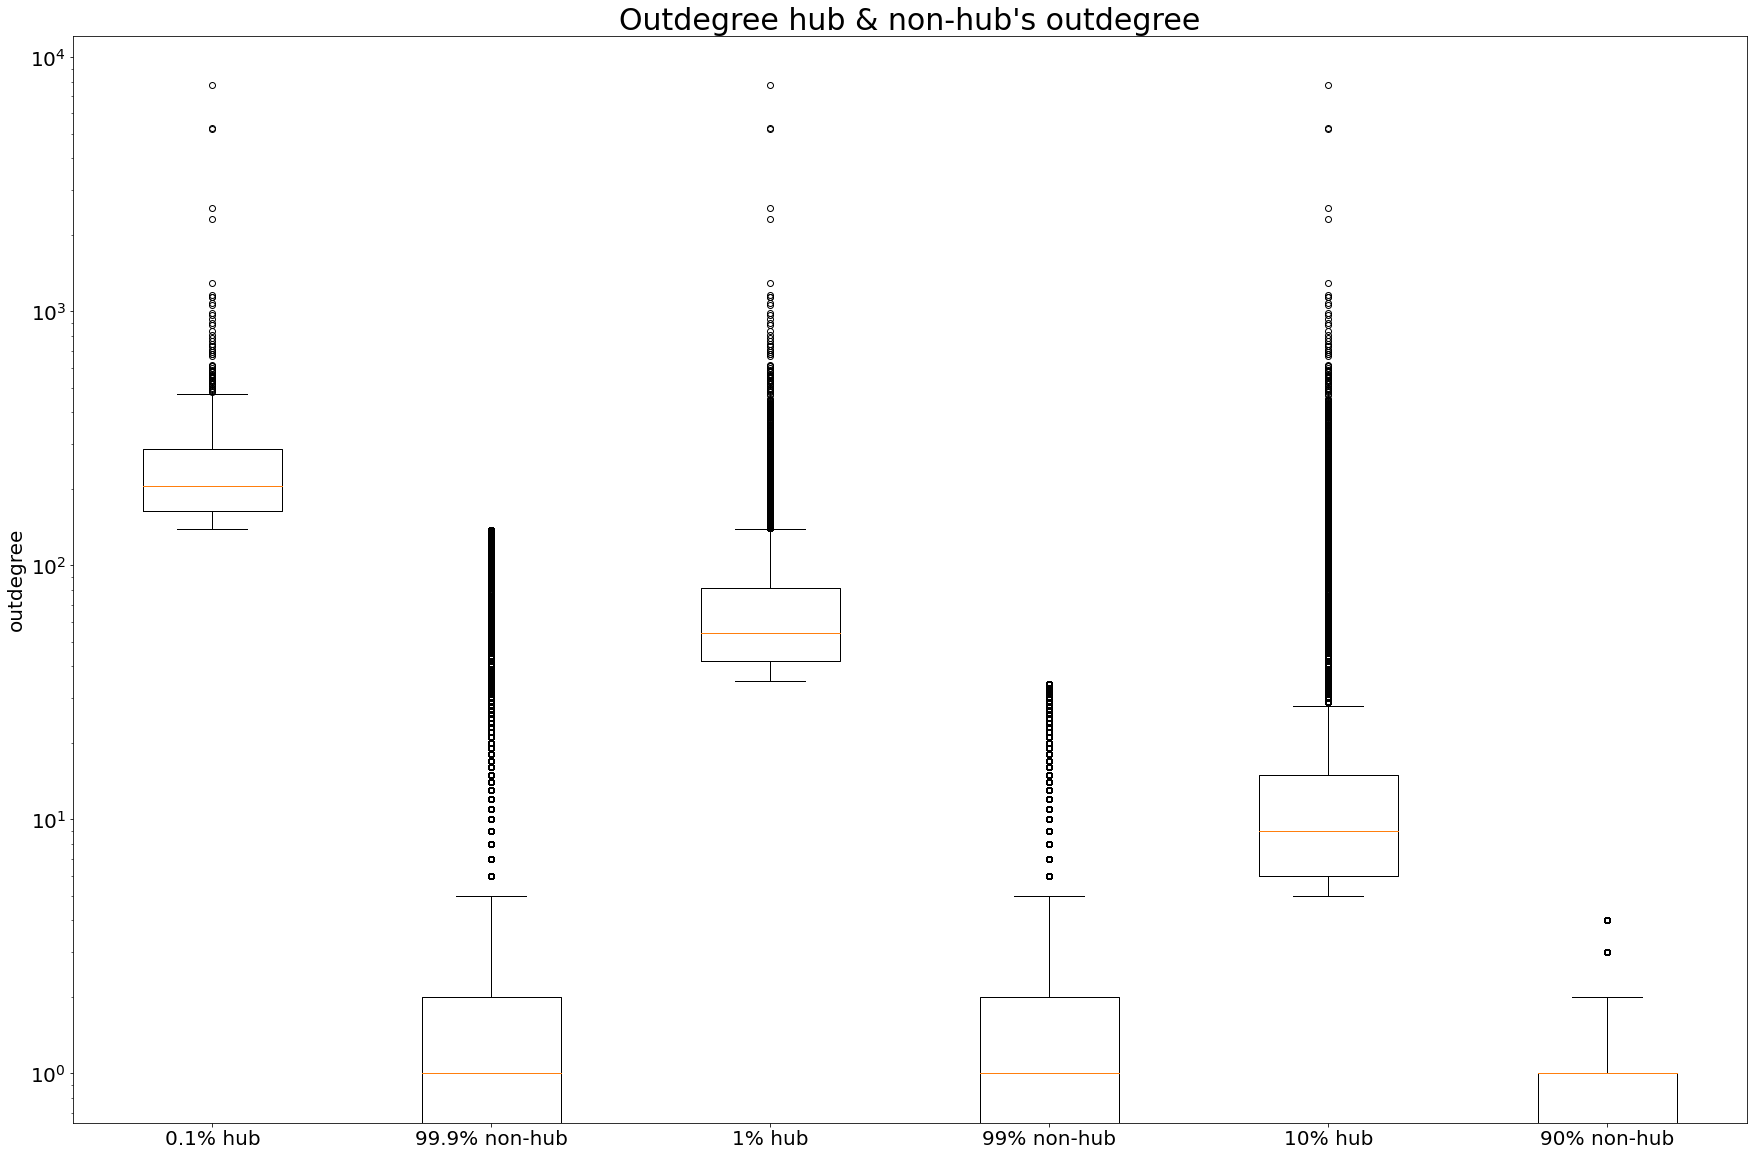

In [107]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub', '10% hub', '90% non-hub']
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's outdegree", xlabel, 'outdegree')

In [108]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 1;')
sqls.append('select indegree from nodes where top_k_outdegree > 1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 10;')
sqls.append('select indegree from nodes where top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

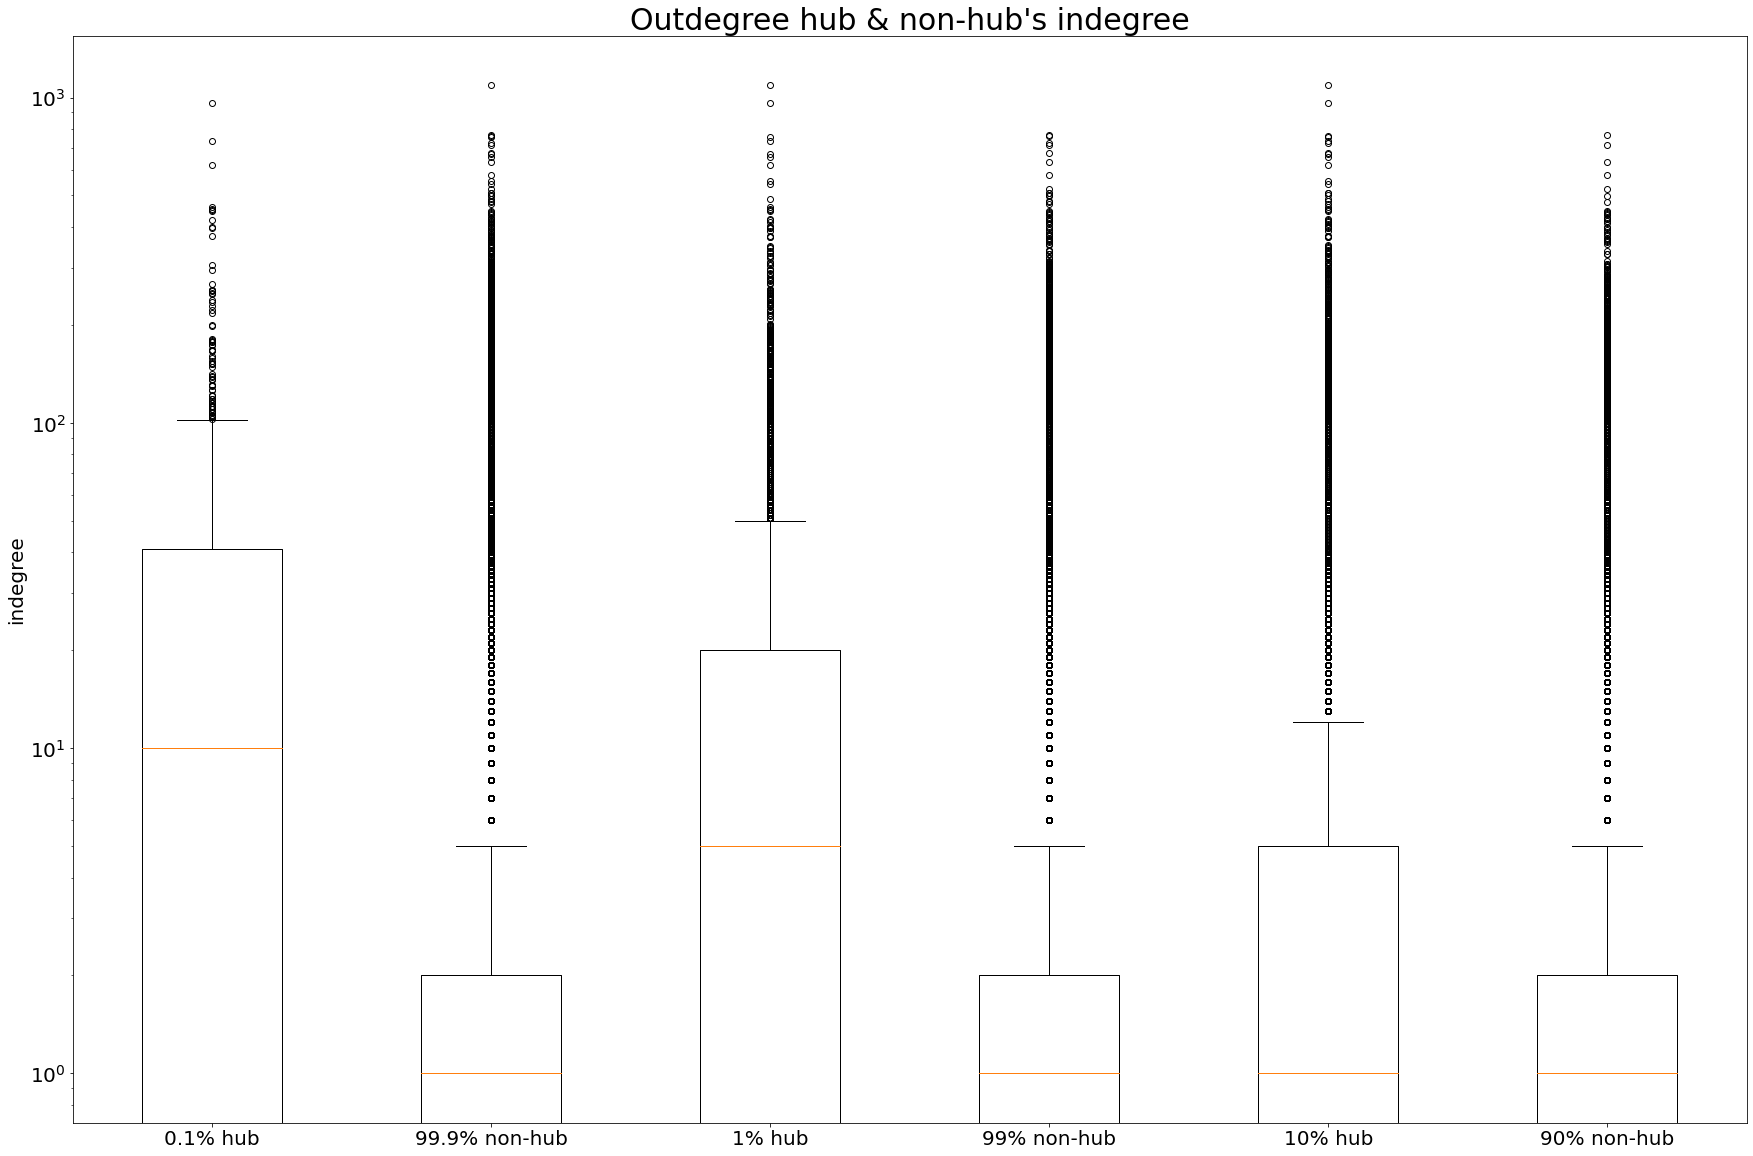

In [109]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's indegree", xlabel, 'indegree')

In [110]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10 and m.posts_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

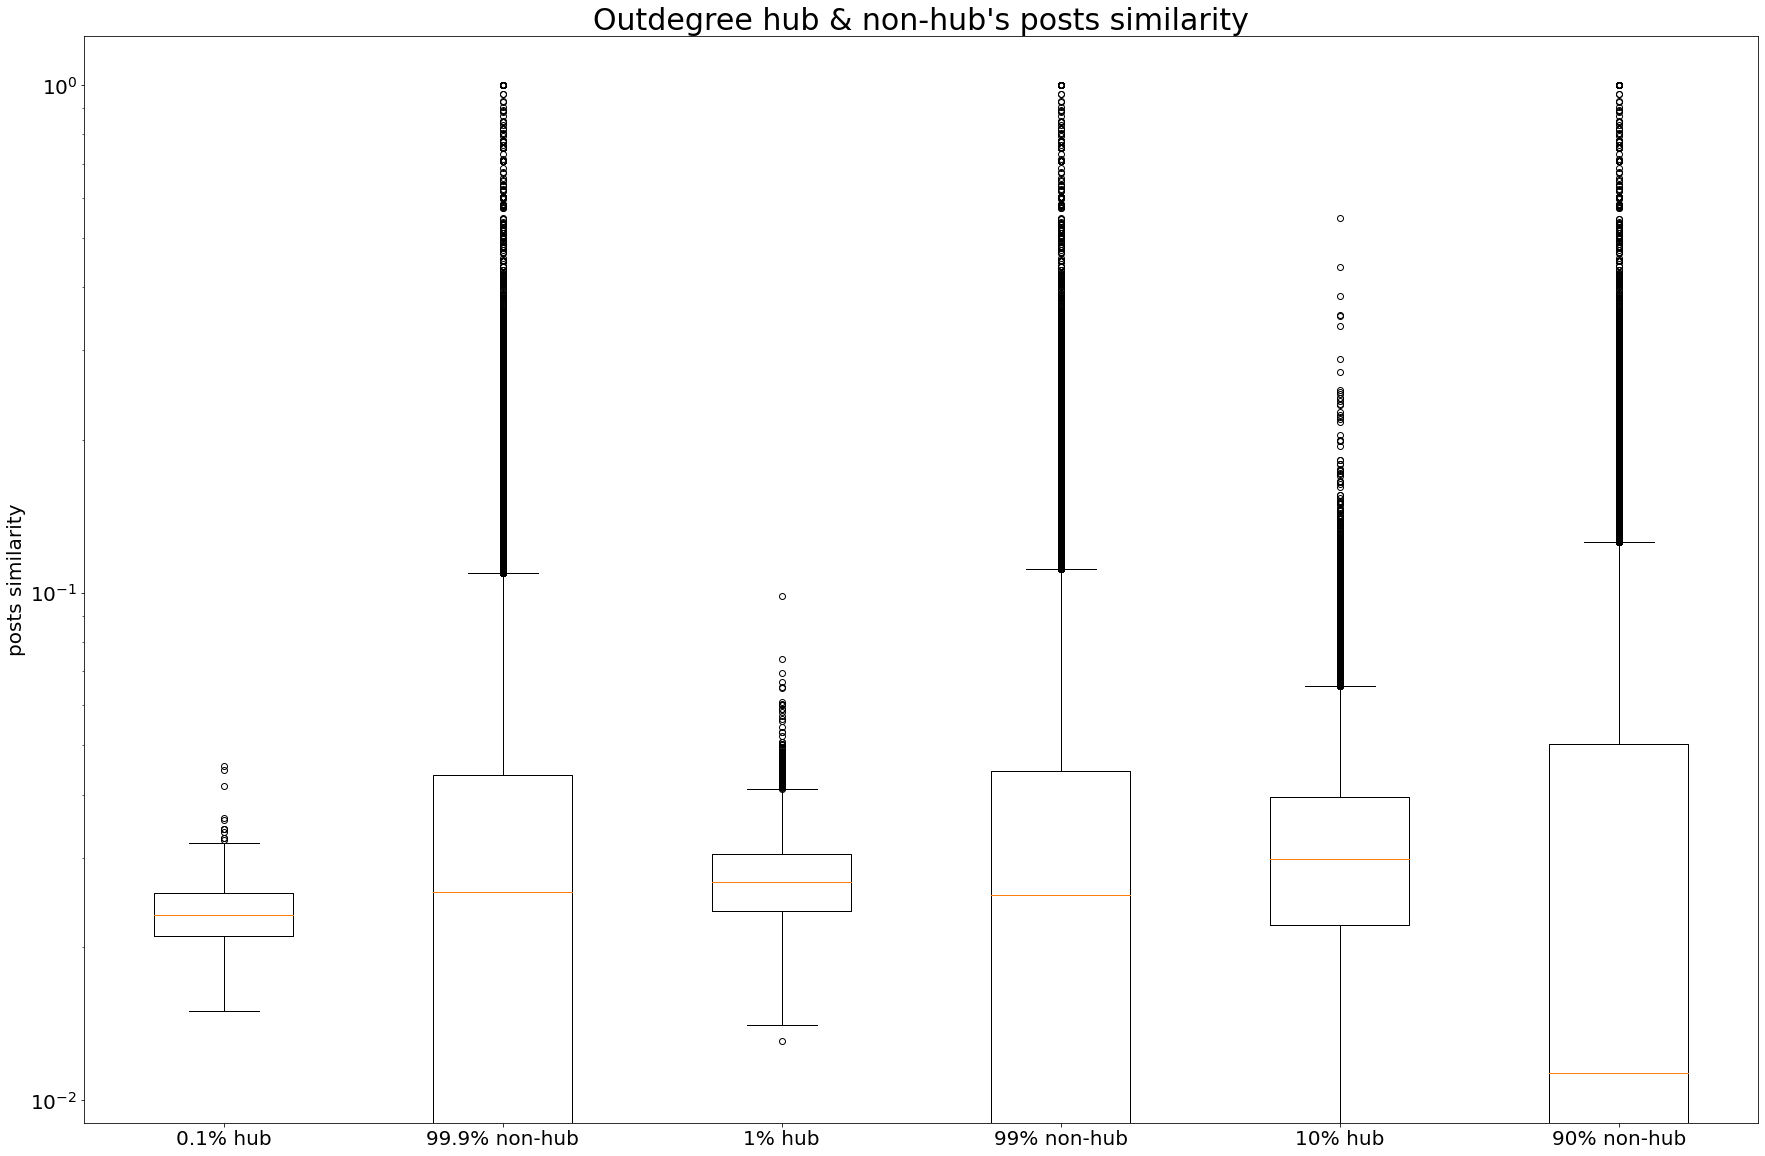

In [111]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's posts similarity", xlabel, 'posts similarity')

In [112]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10 and m.comments_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

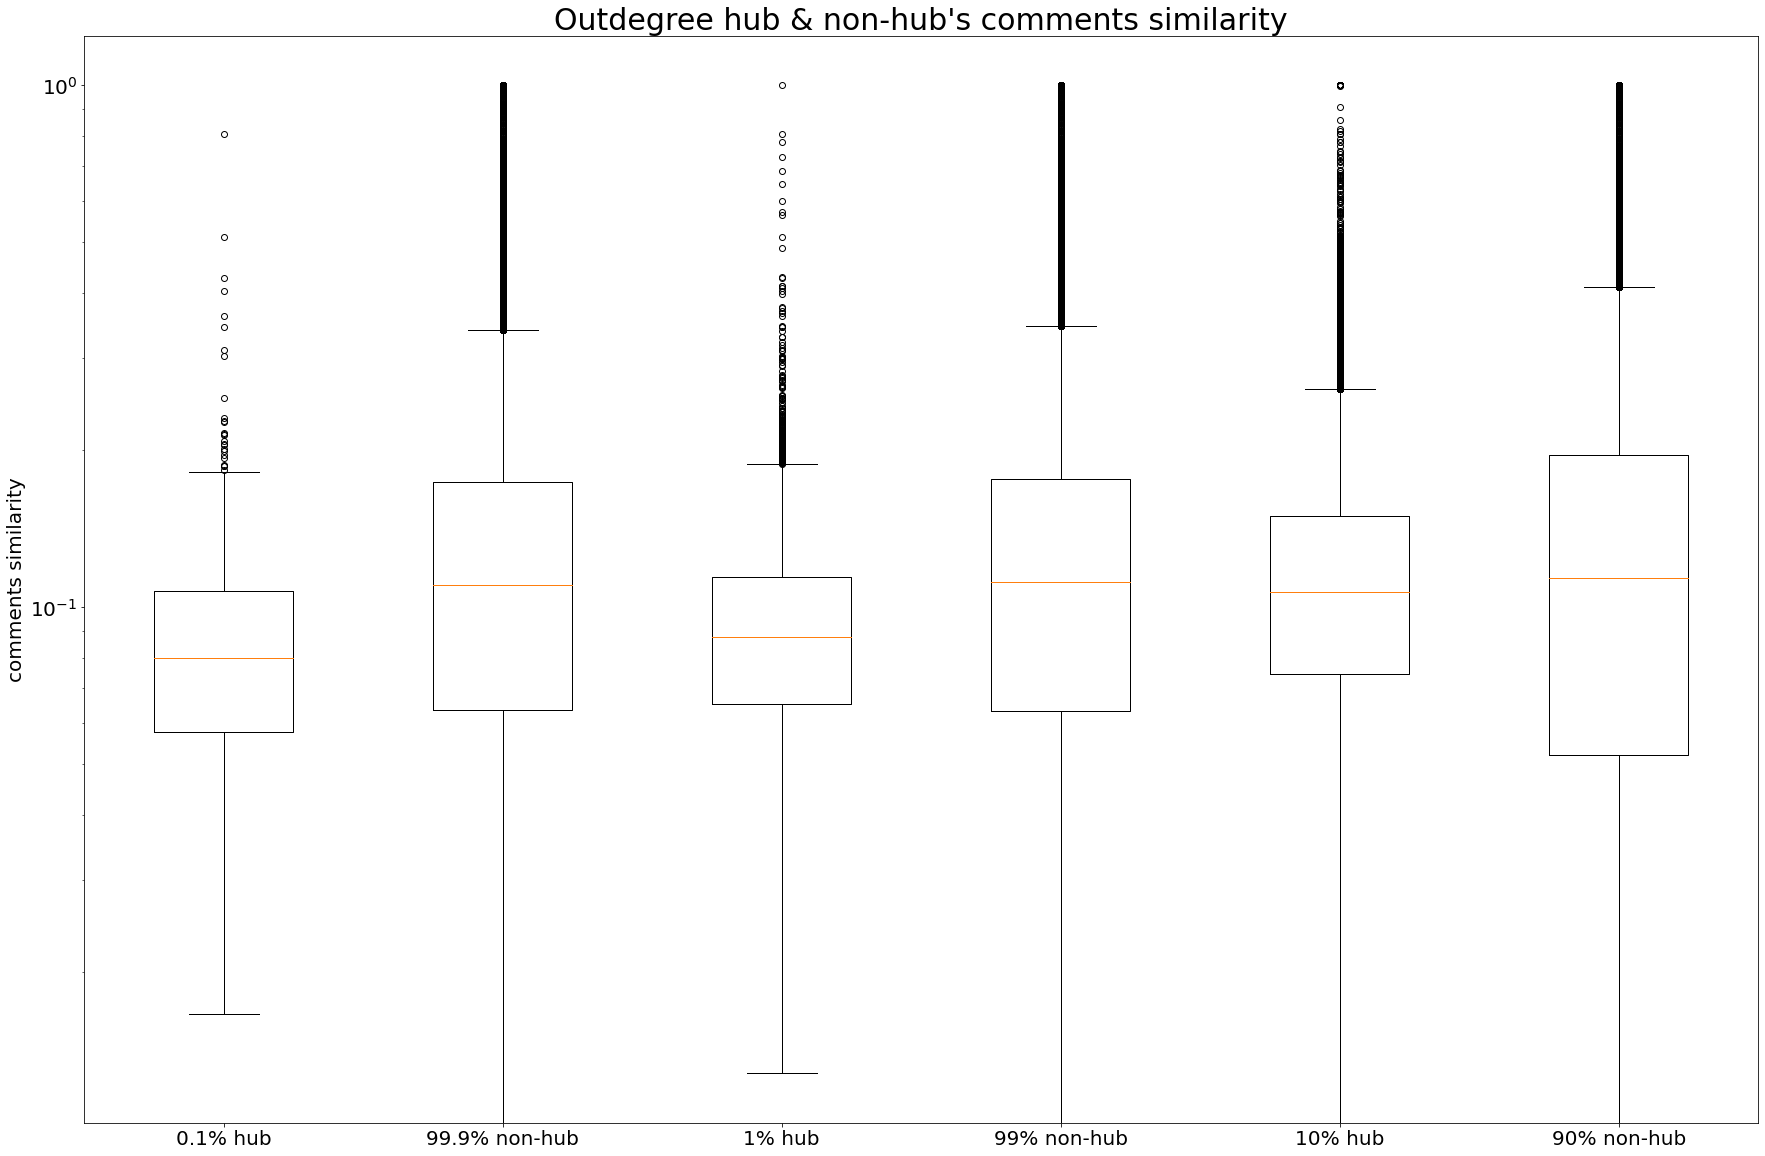

In [113]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's comments similarity", xlabel, 'comments similarity')

In [114]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))

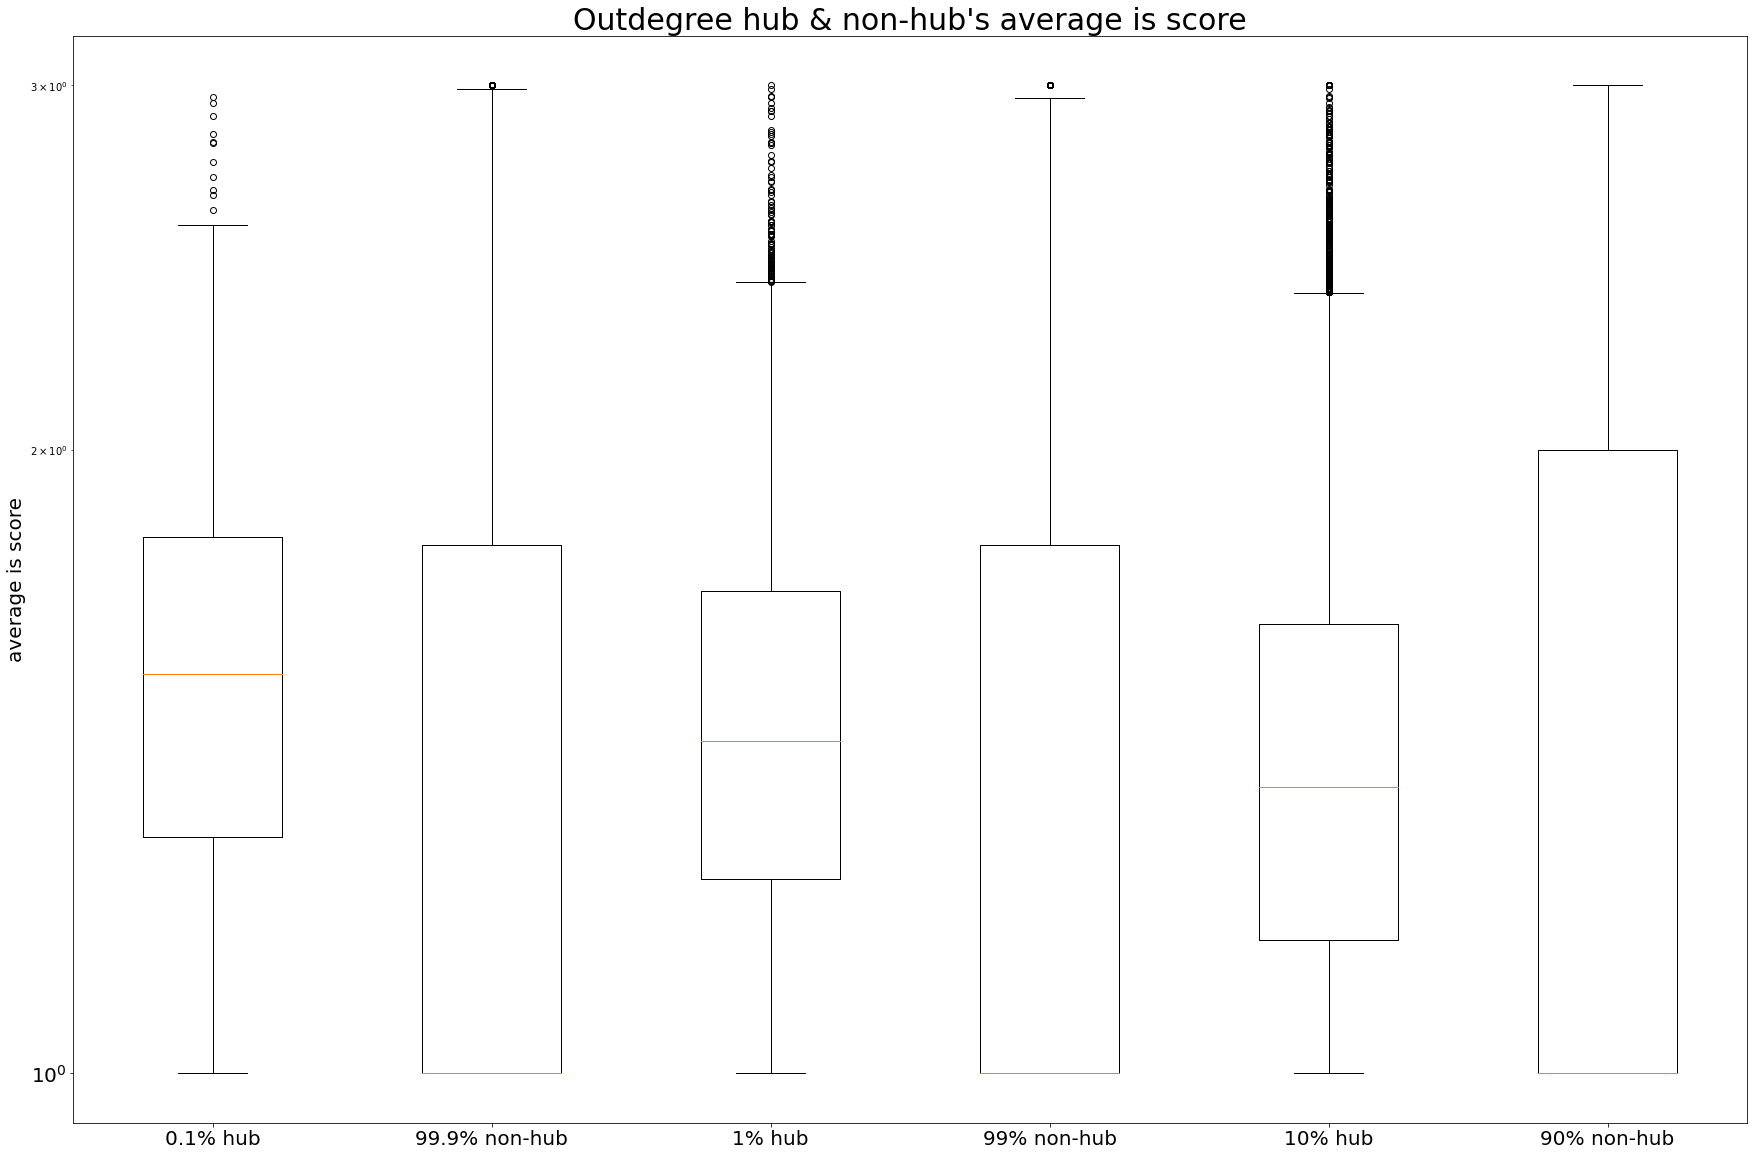

In [115]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average is score", xlabel, 'average is score')

In [116]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

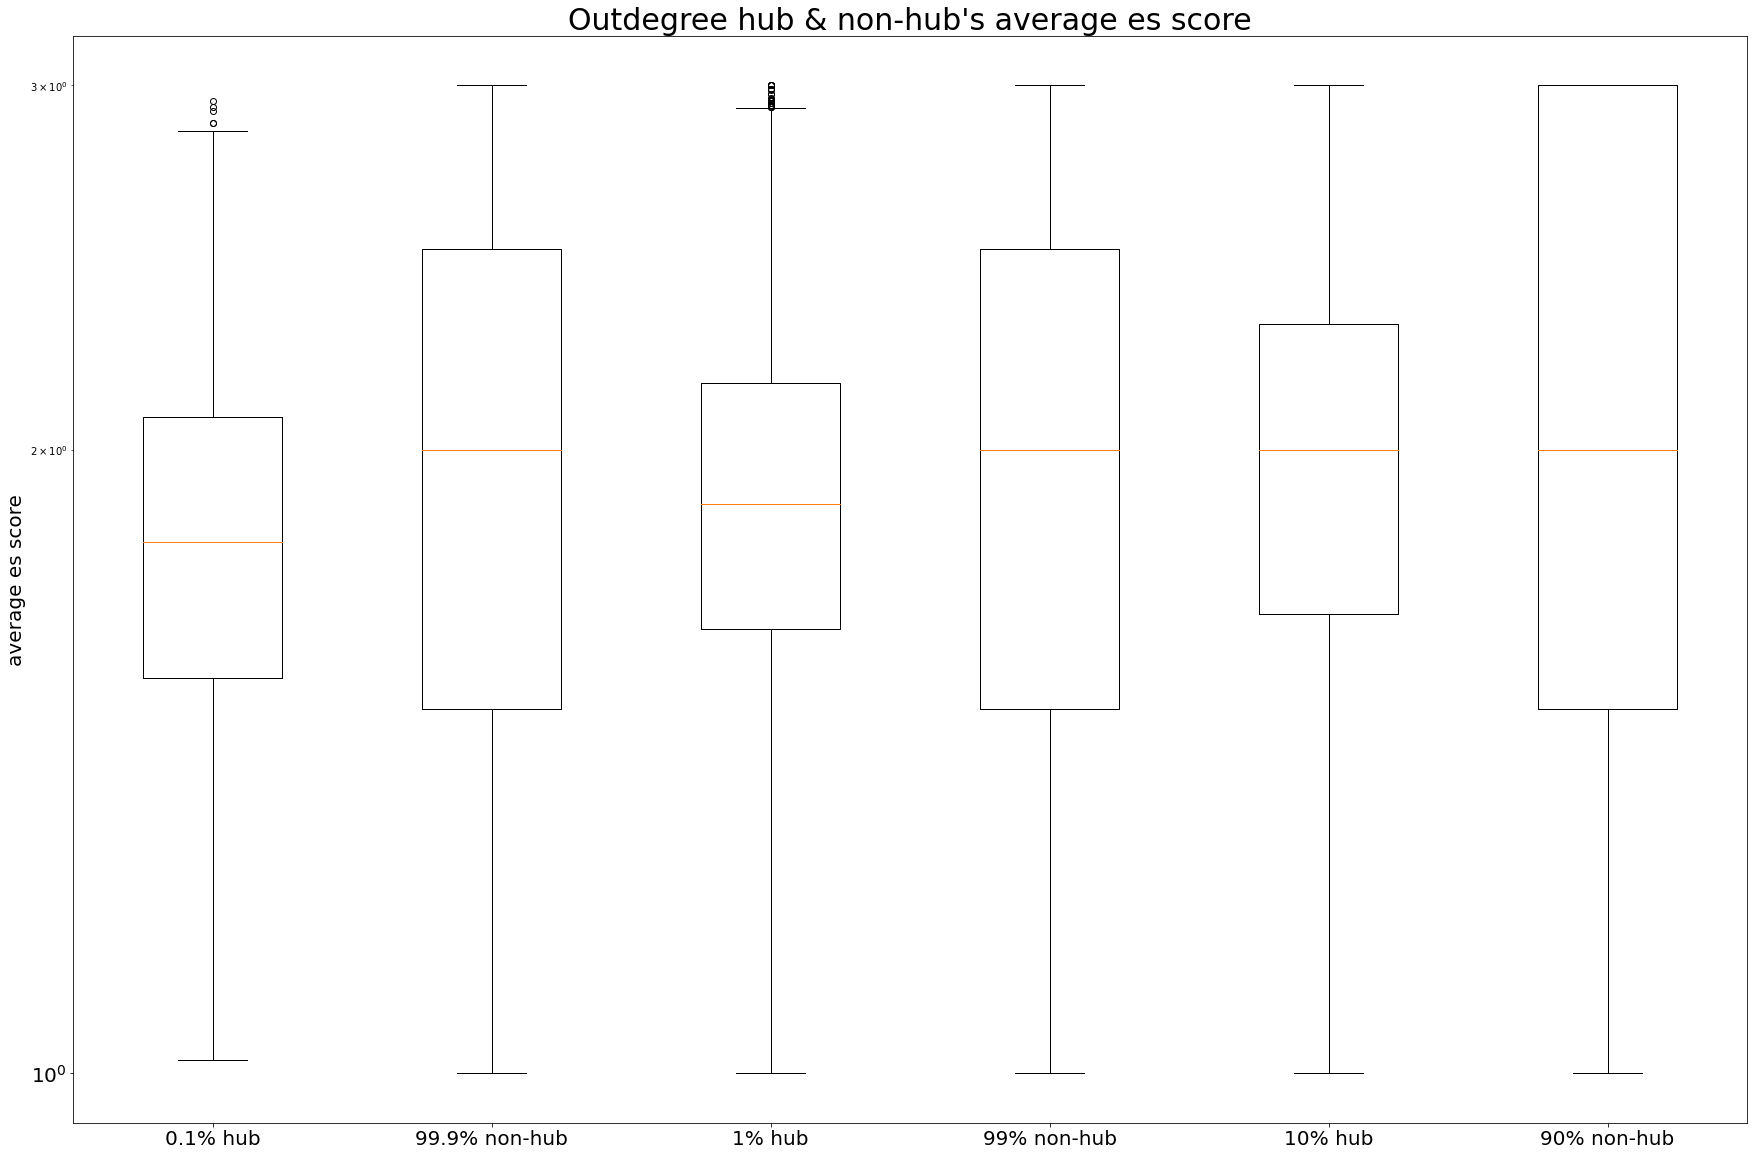

In [117]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average es score", xlabel, 'average es score')

In [118]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

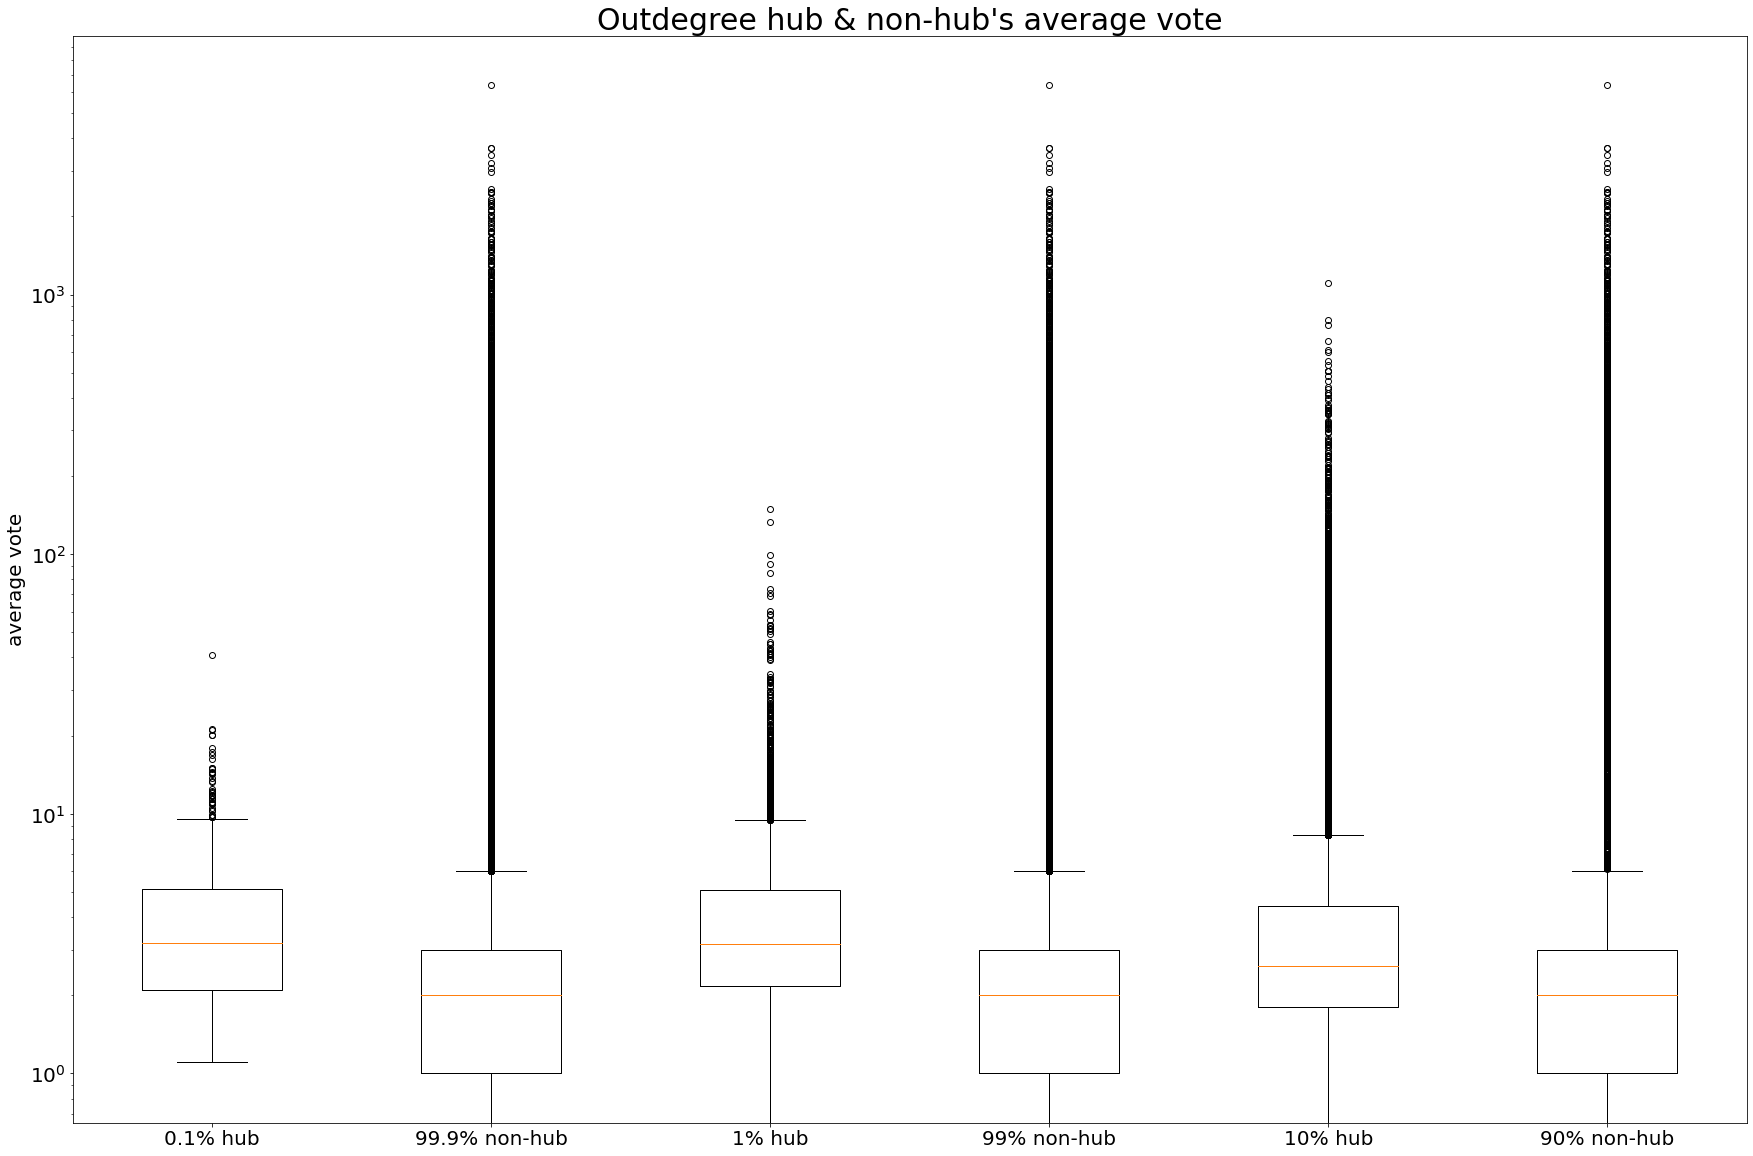

In [119]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average vote", xlabel, 'average vote')

In [120]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_indegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 1;')
sqls.append('select outdegree from nodes where top_k_indegree > 1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 10;')
sqls.append('select outdegree from nodes where top_k_indegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

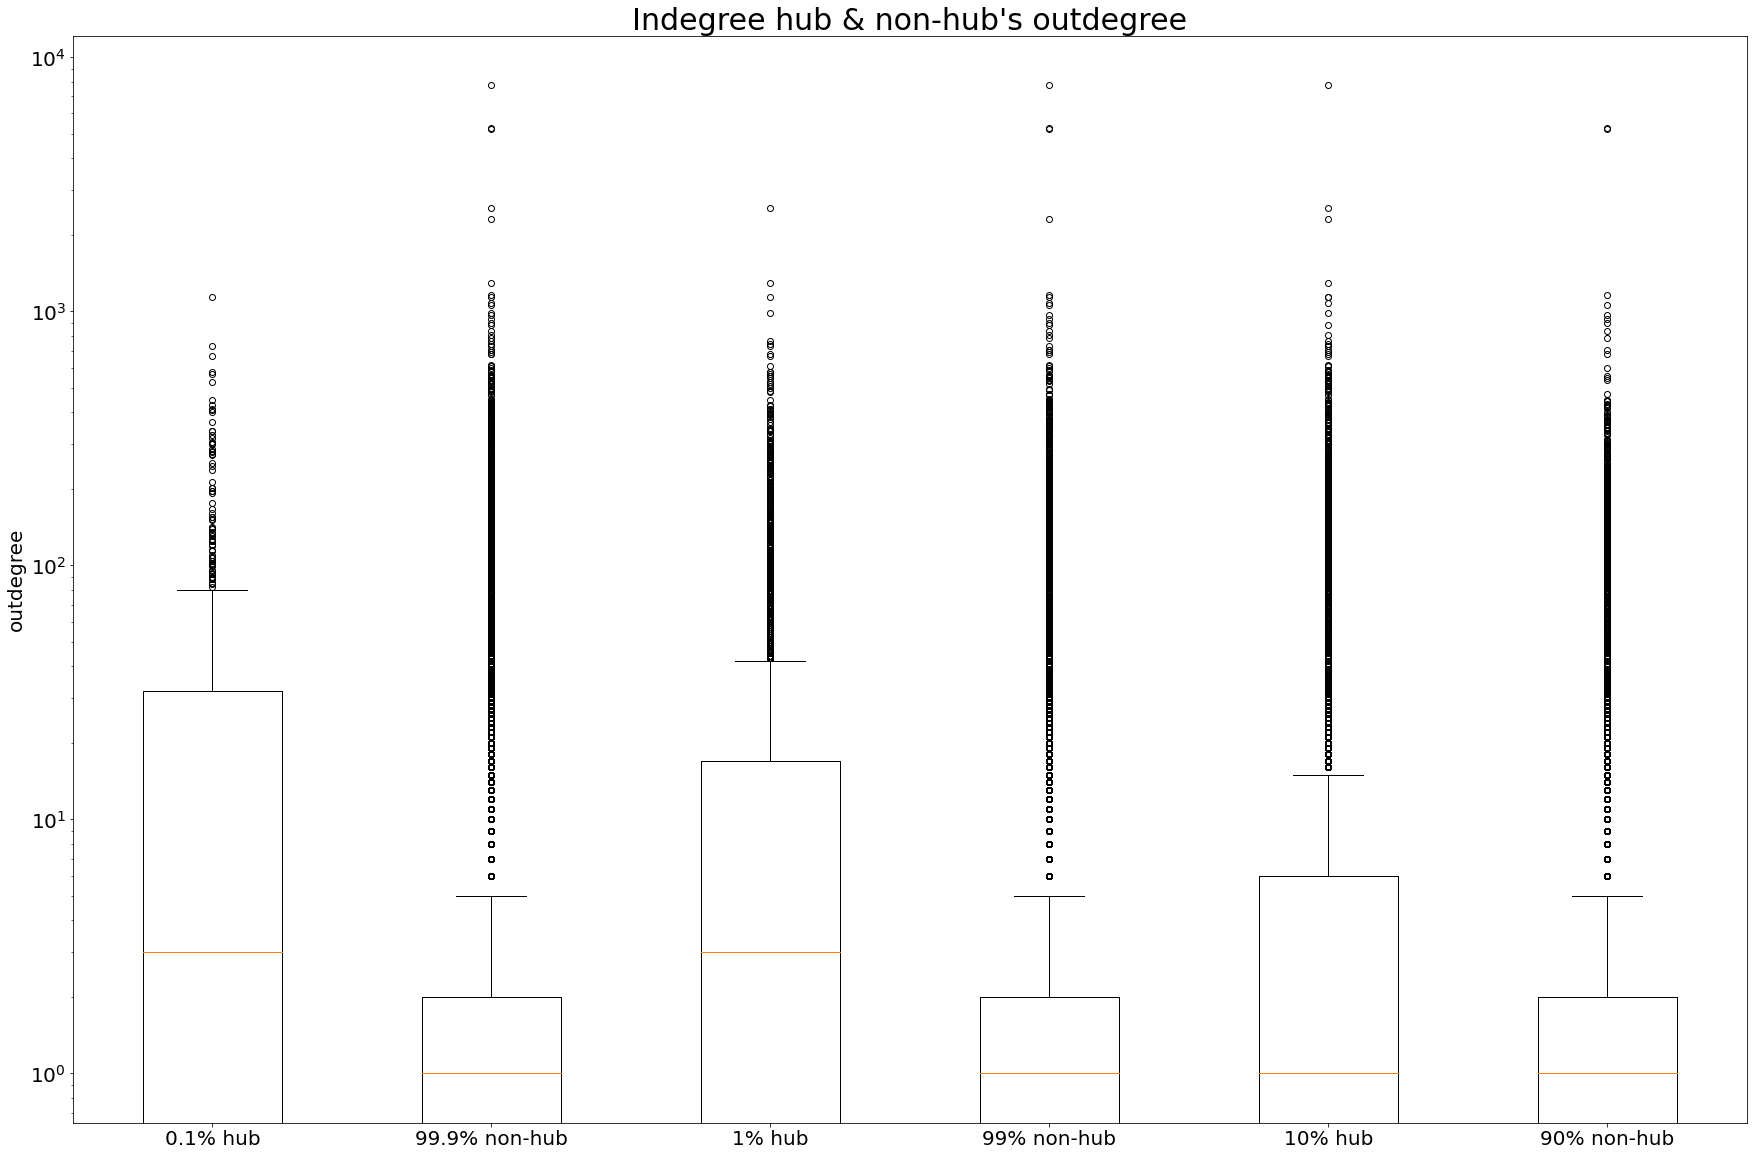

In [121]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's outdegree", xlabel, 'outdegree')

In [122]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_indegree = 0.1;')
sqls.append('select indegree from nodes where top_k_indegree > 0.1;')
sqls.append('select indegree from nodes where top_k_indegree <= 1;')
sqls.append('select indegree from nodes where top_k_indegree > 1;')
sqls.append('select indegree from nodes where top_k_indegree <= 10;')
sqls.append('select indegree from nodes where top_k_indegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

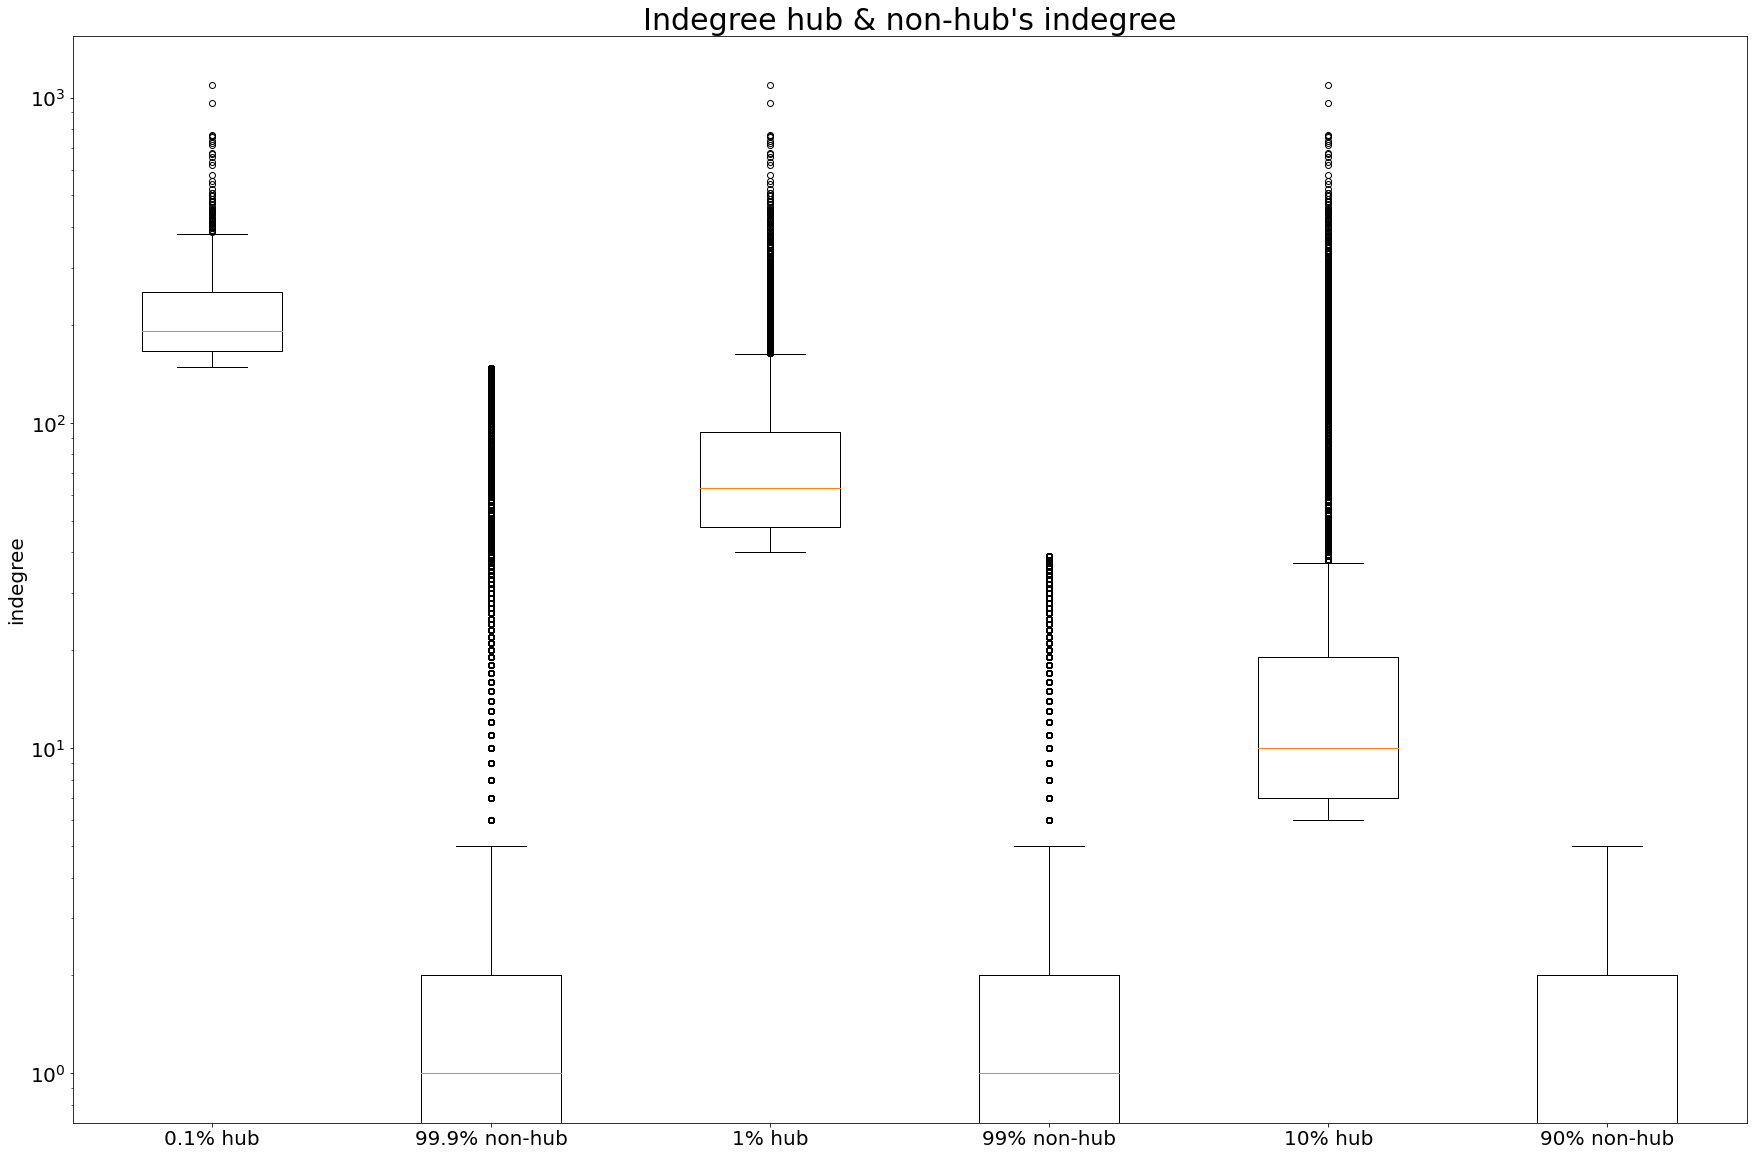

In [123]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's indegree", xlabel, 'indegree')

In [130]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_is_score is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))

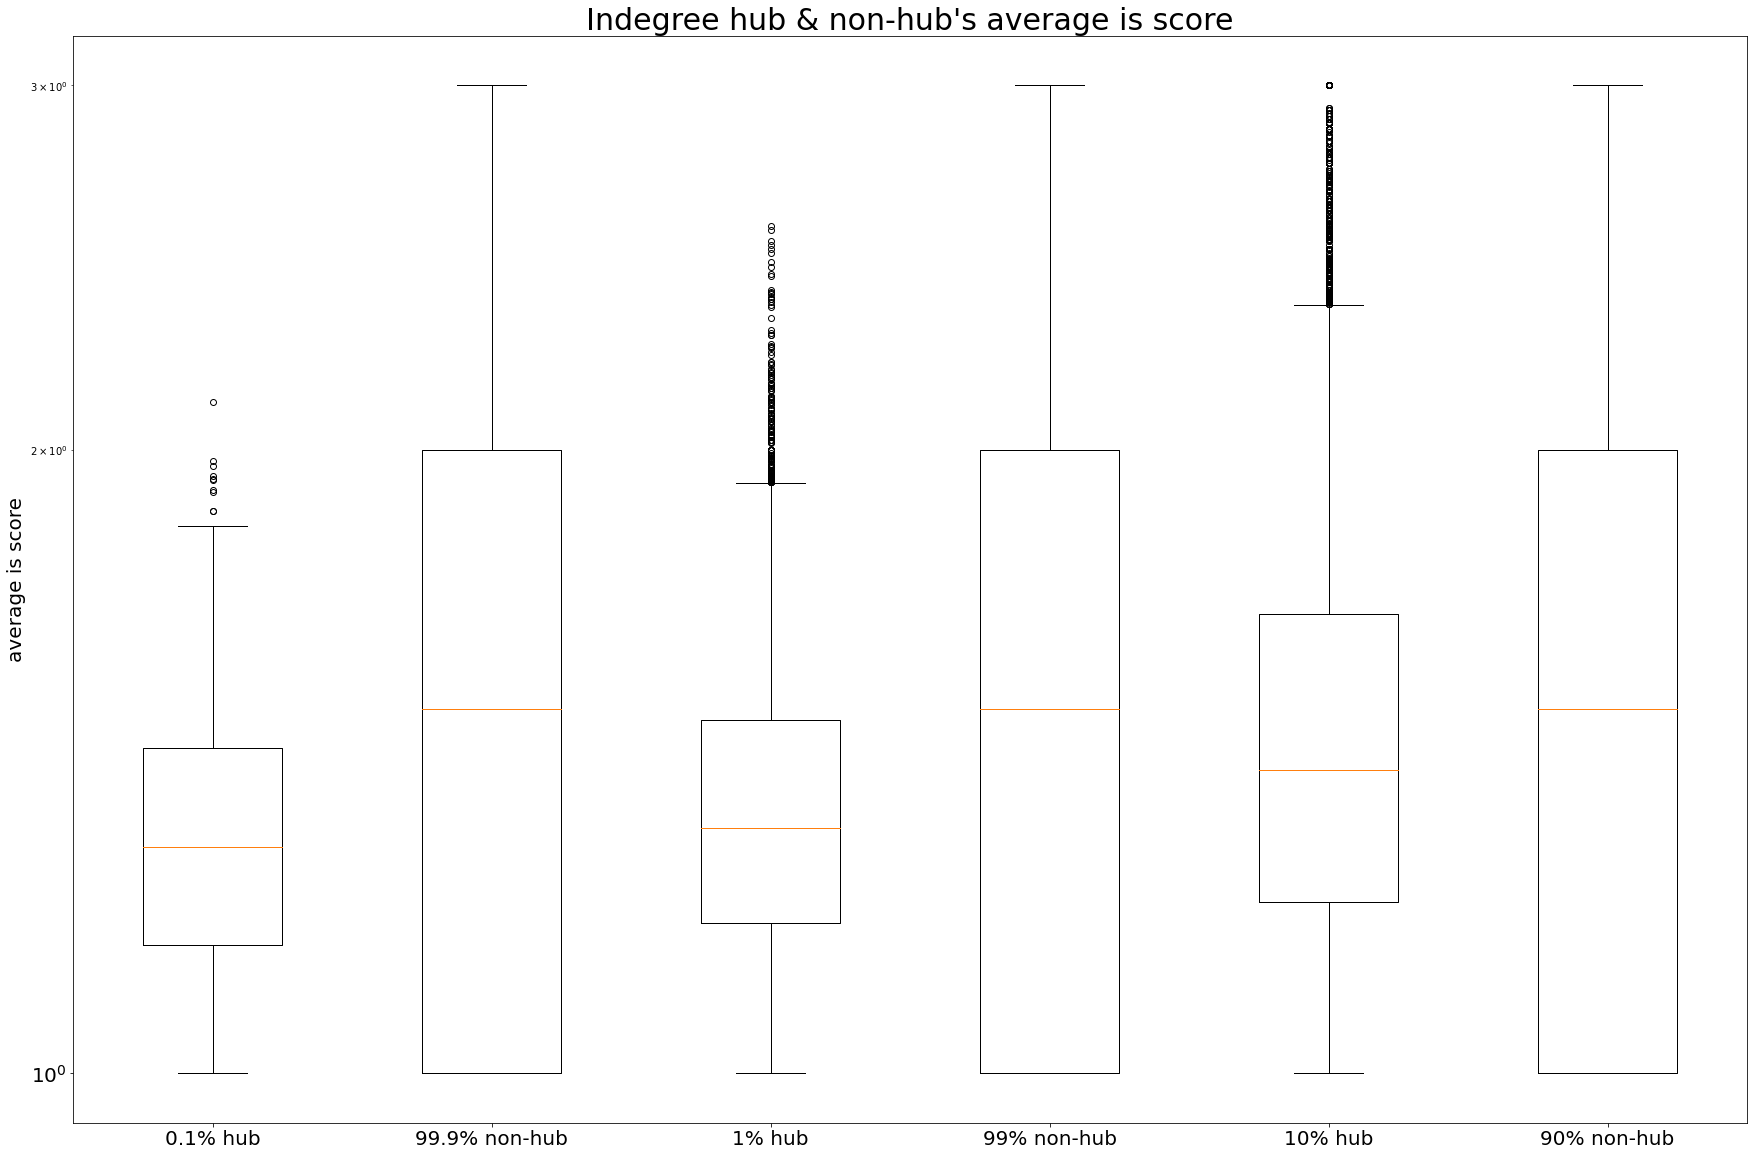

In [131]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average is score", xlabel, 'average is score')

In [132]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_es_score is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

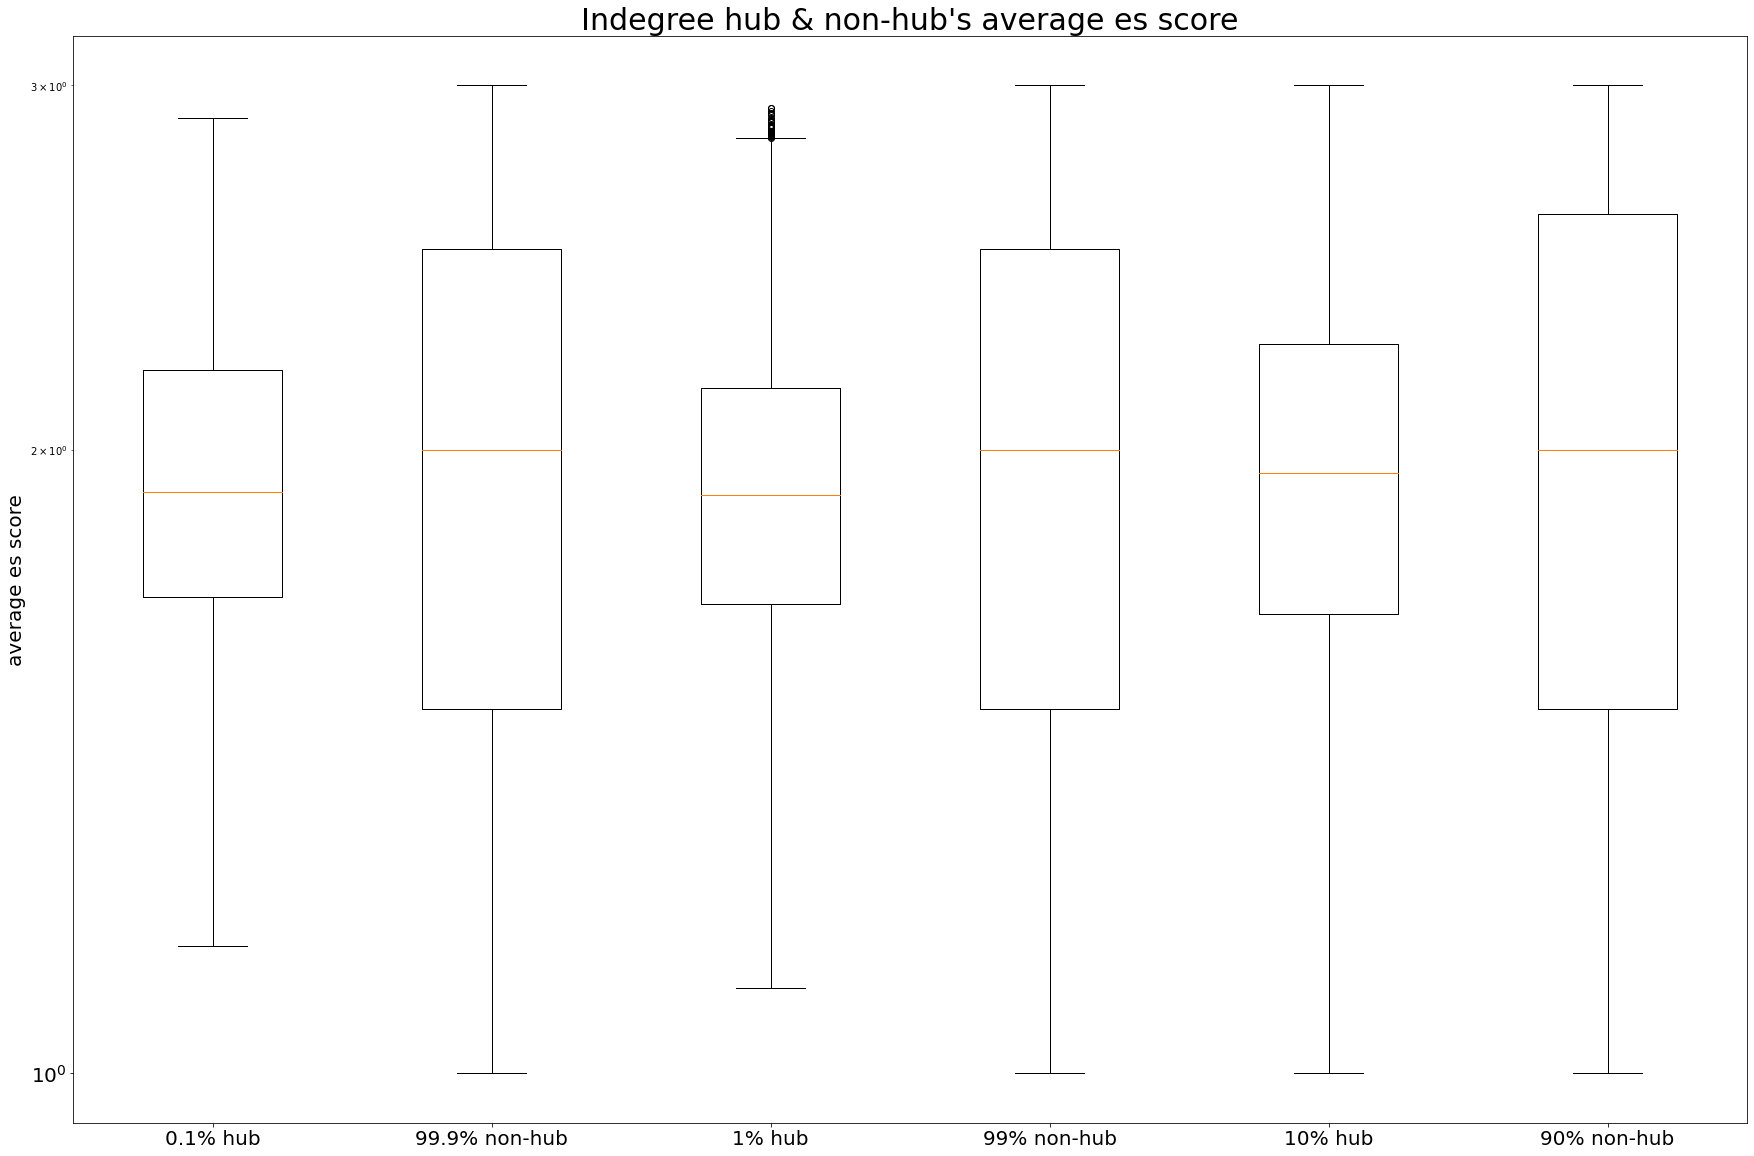

In [133]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average es score", xlabel, 'average es score')

In [134]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_comments_vote is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_comments_vote'].tolist())))

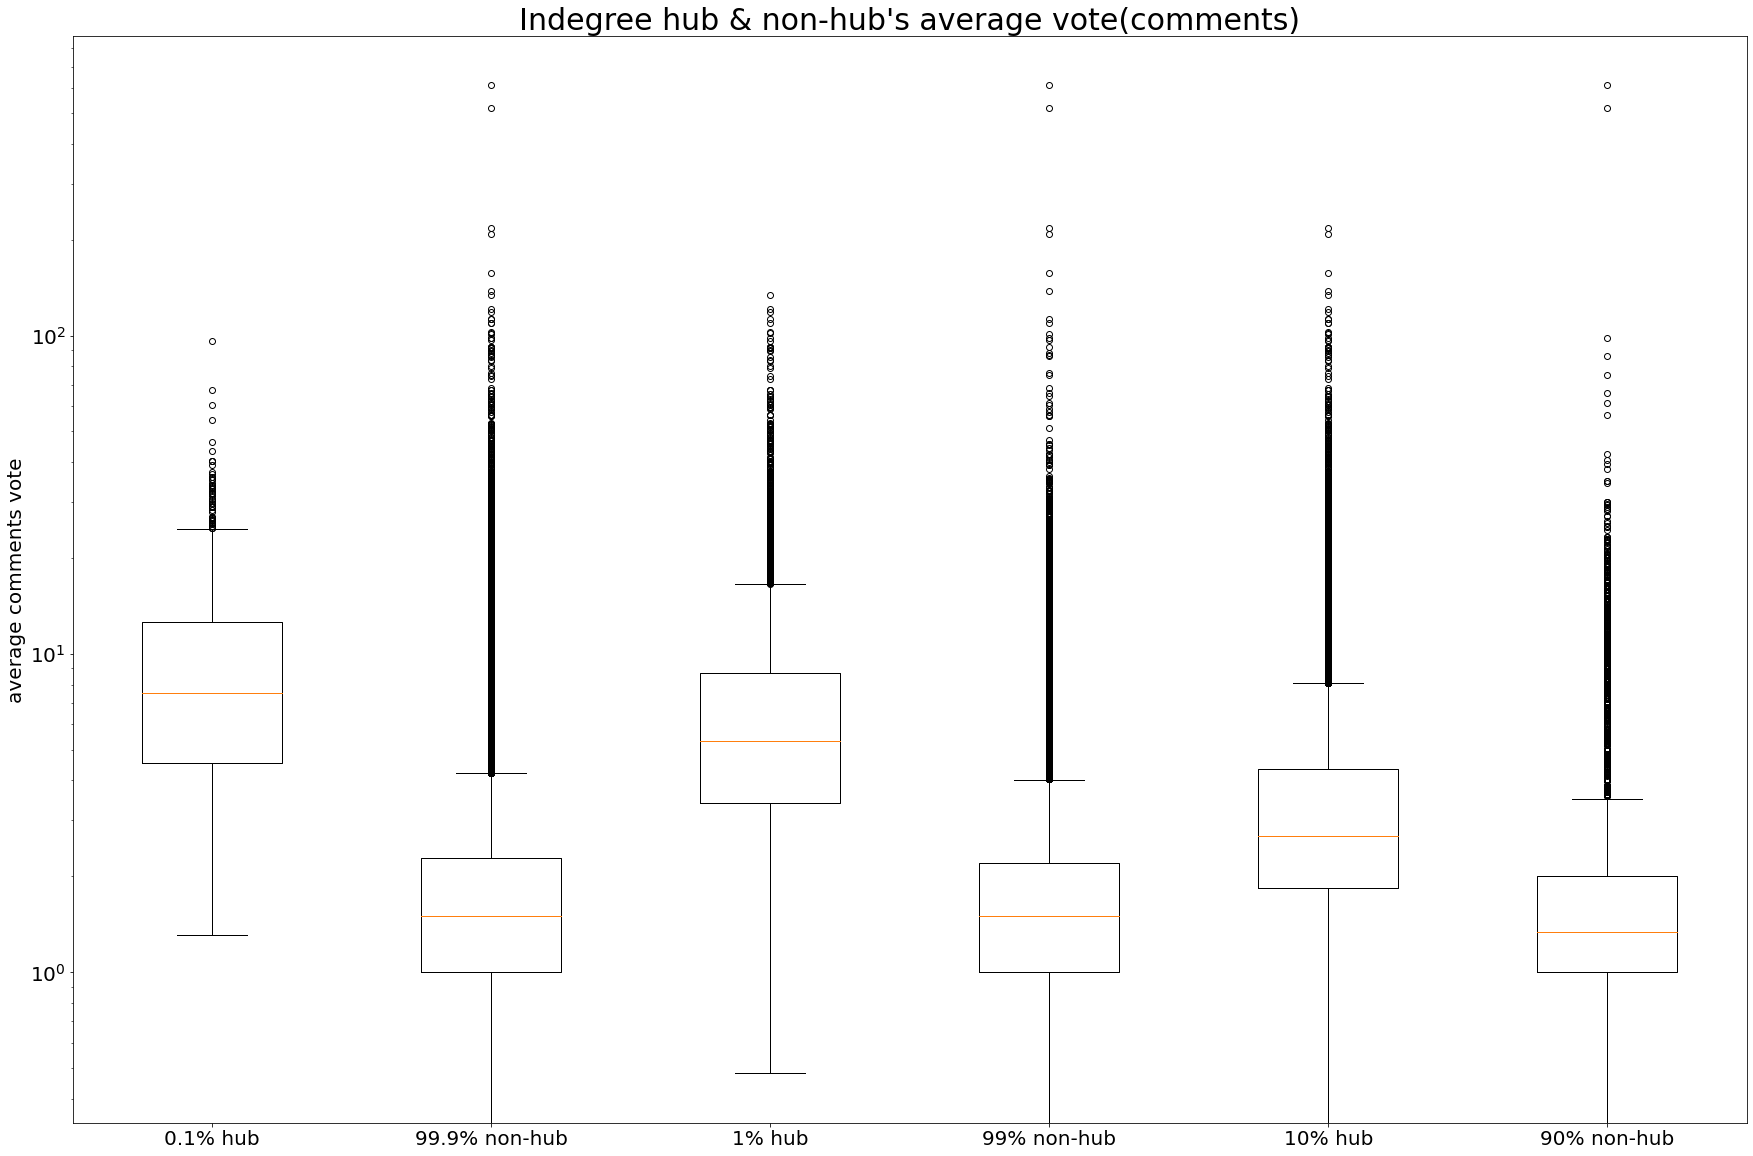

In [136]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average vote(comments)", xlabel, 'average comments vote')

In [137]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_vote is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

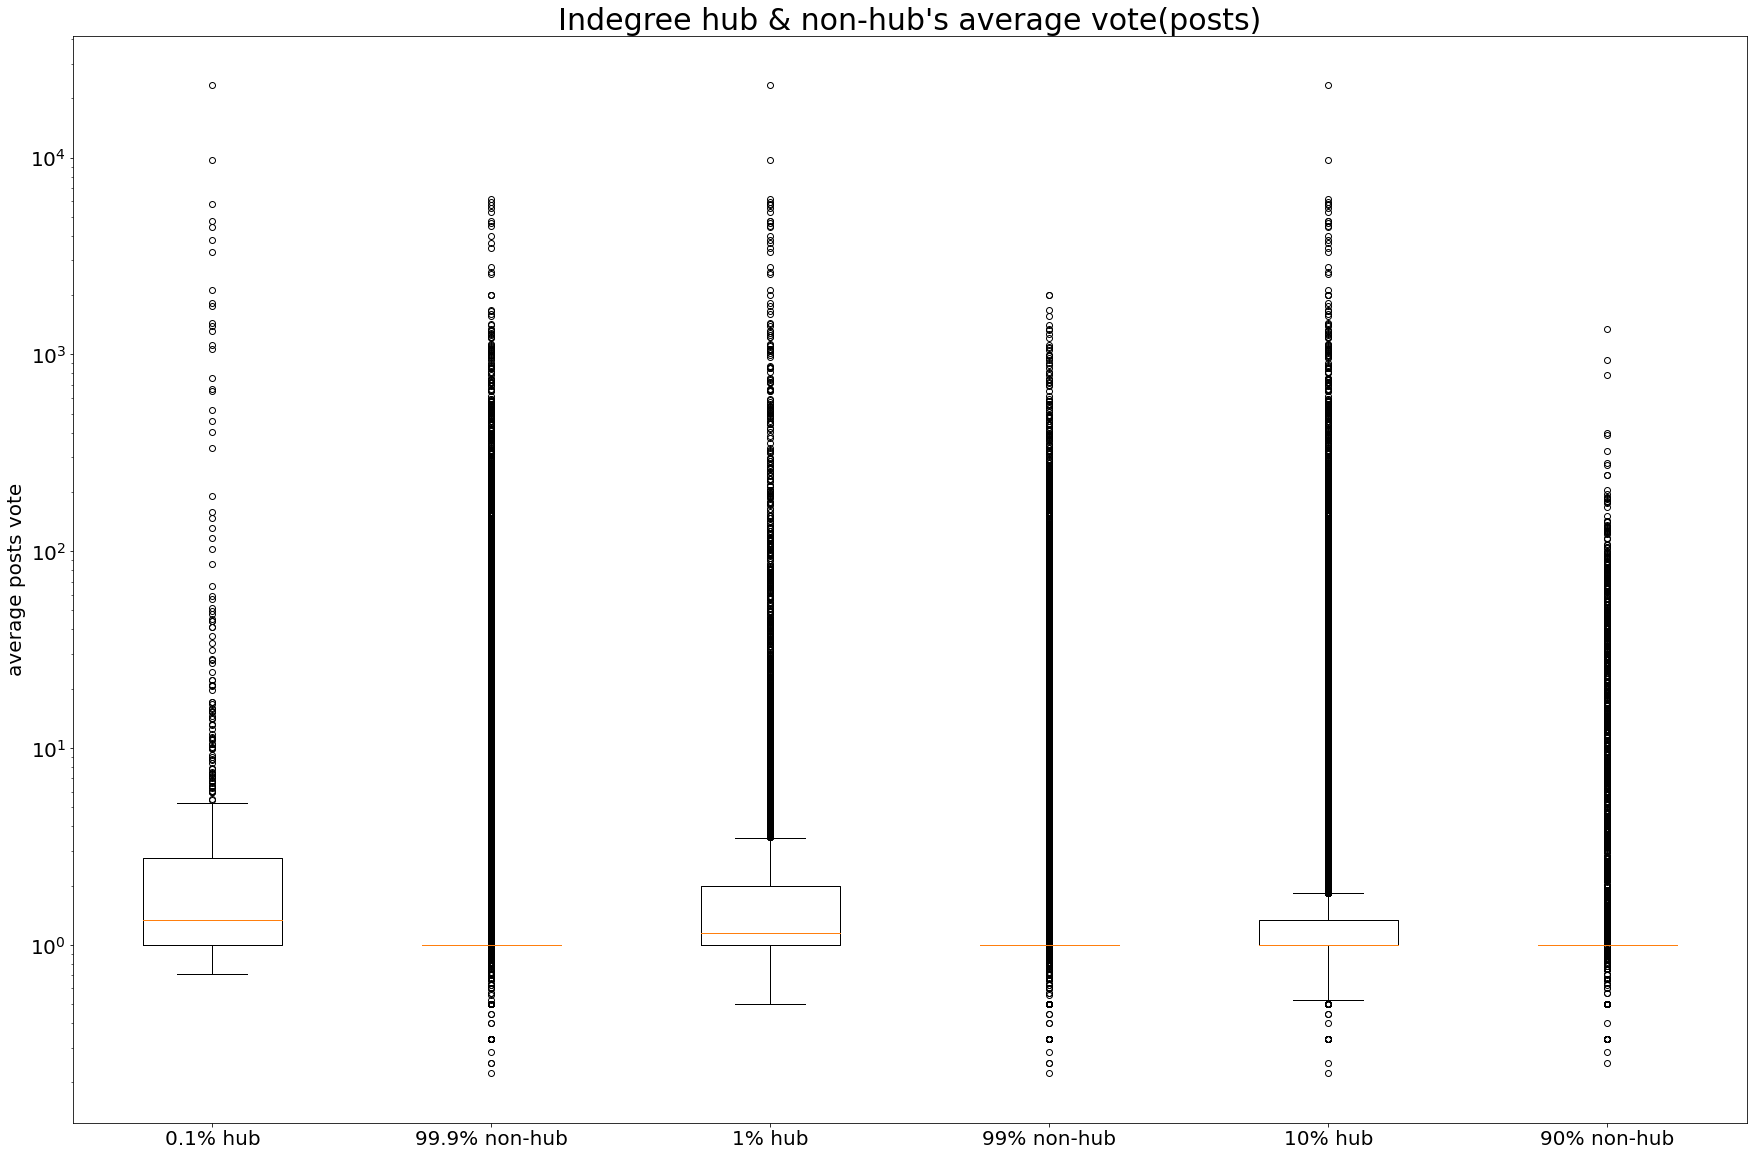

In [138]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average vote(posts)", xlabel, 'average posts vote')

In [139]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.posts_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

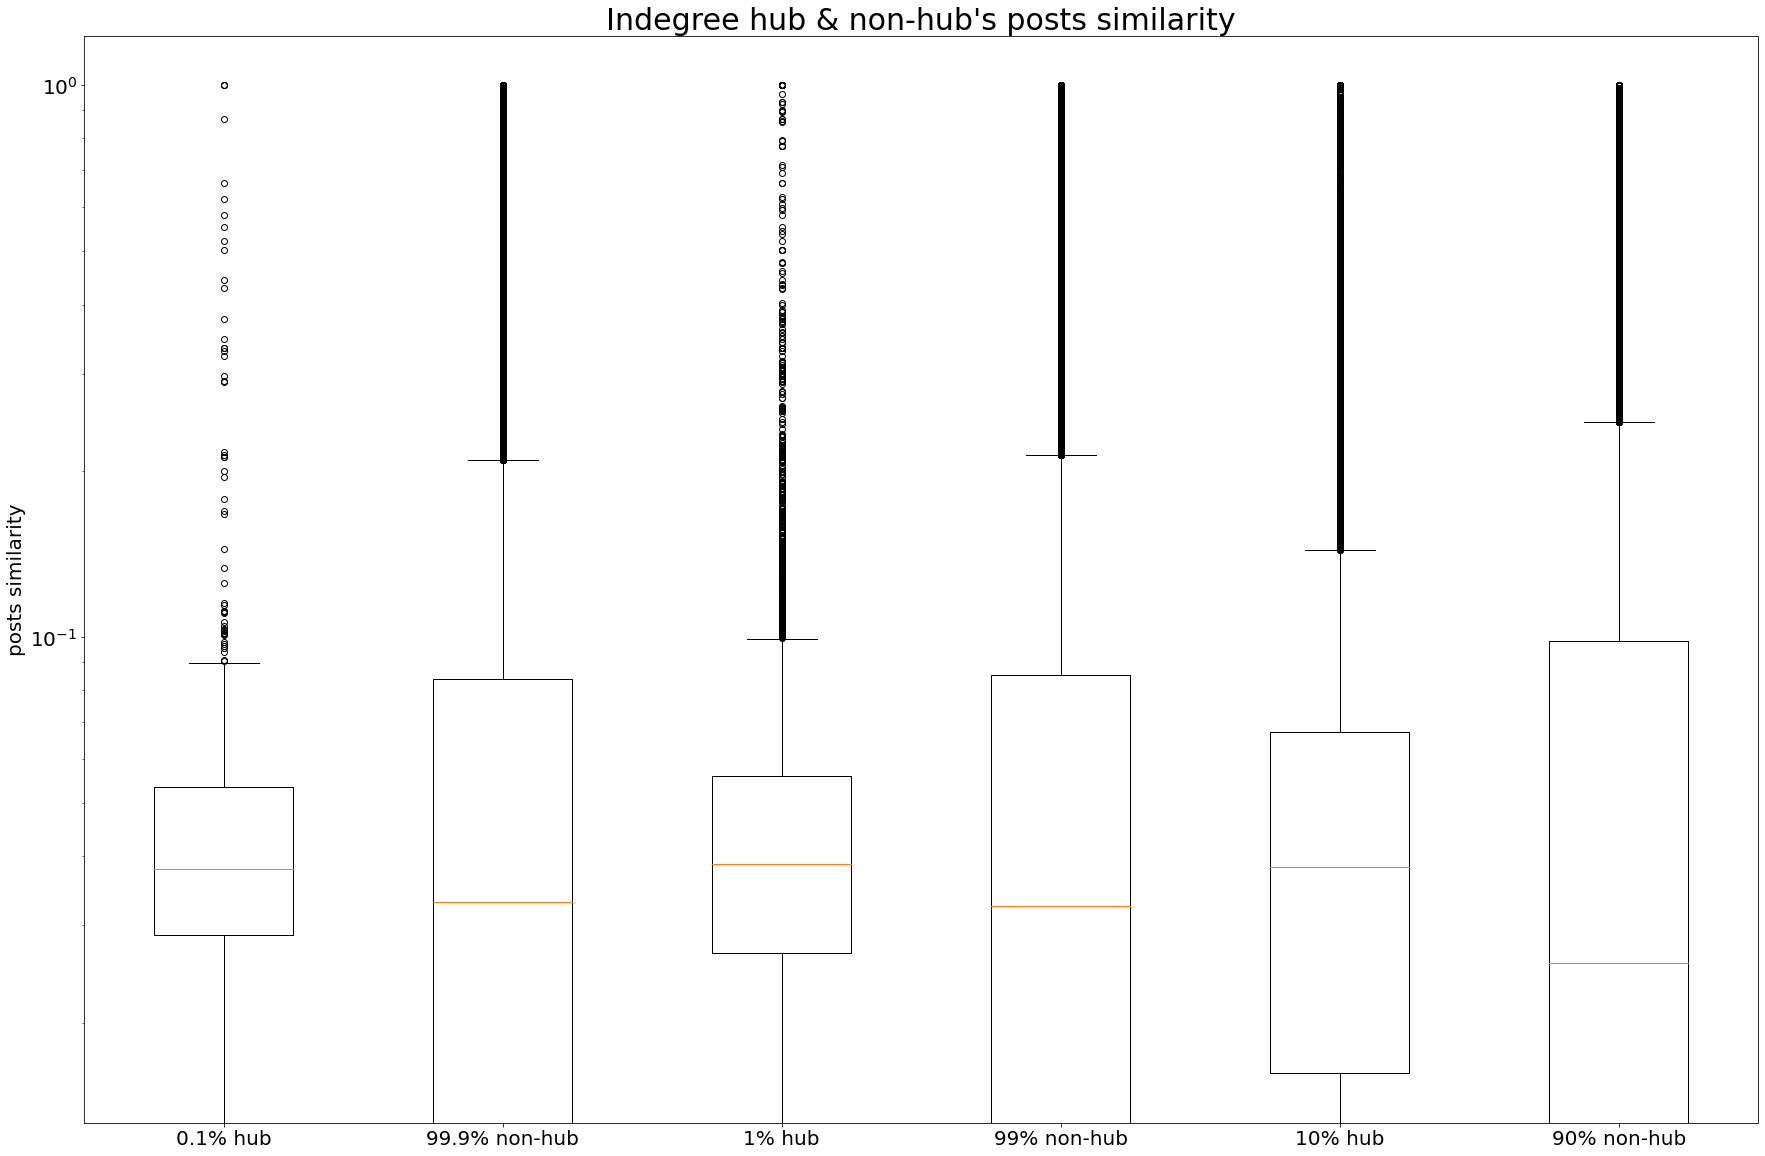

In [140]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's posts similarity", xlabel, 'posts similarity')

In [141]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.comments_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

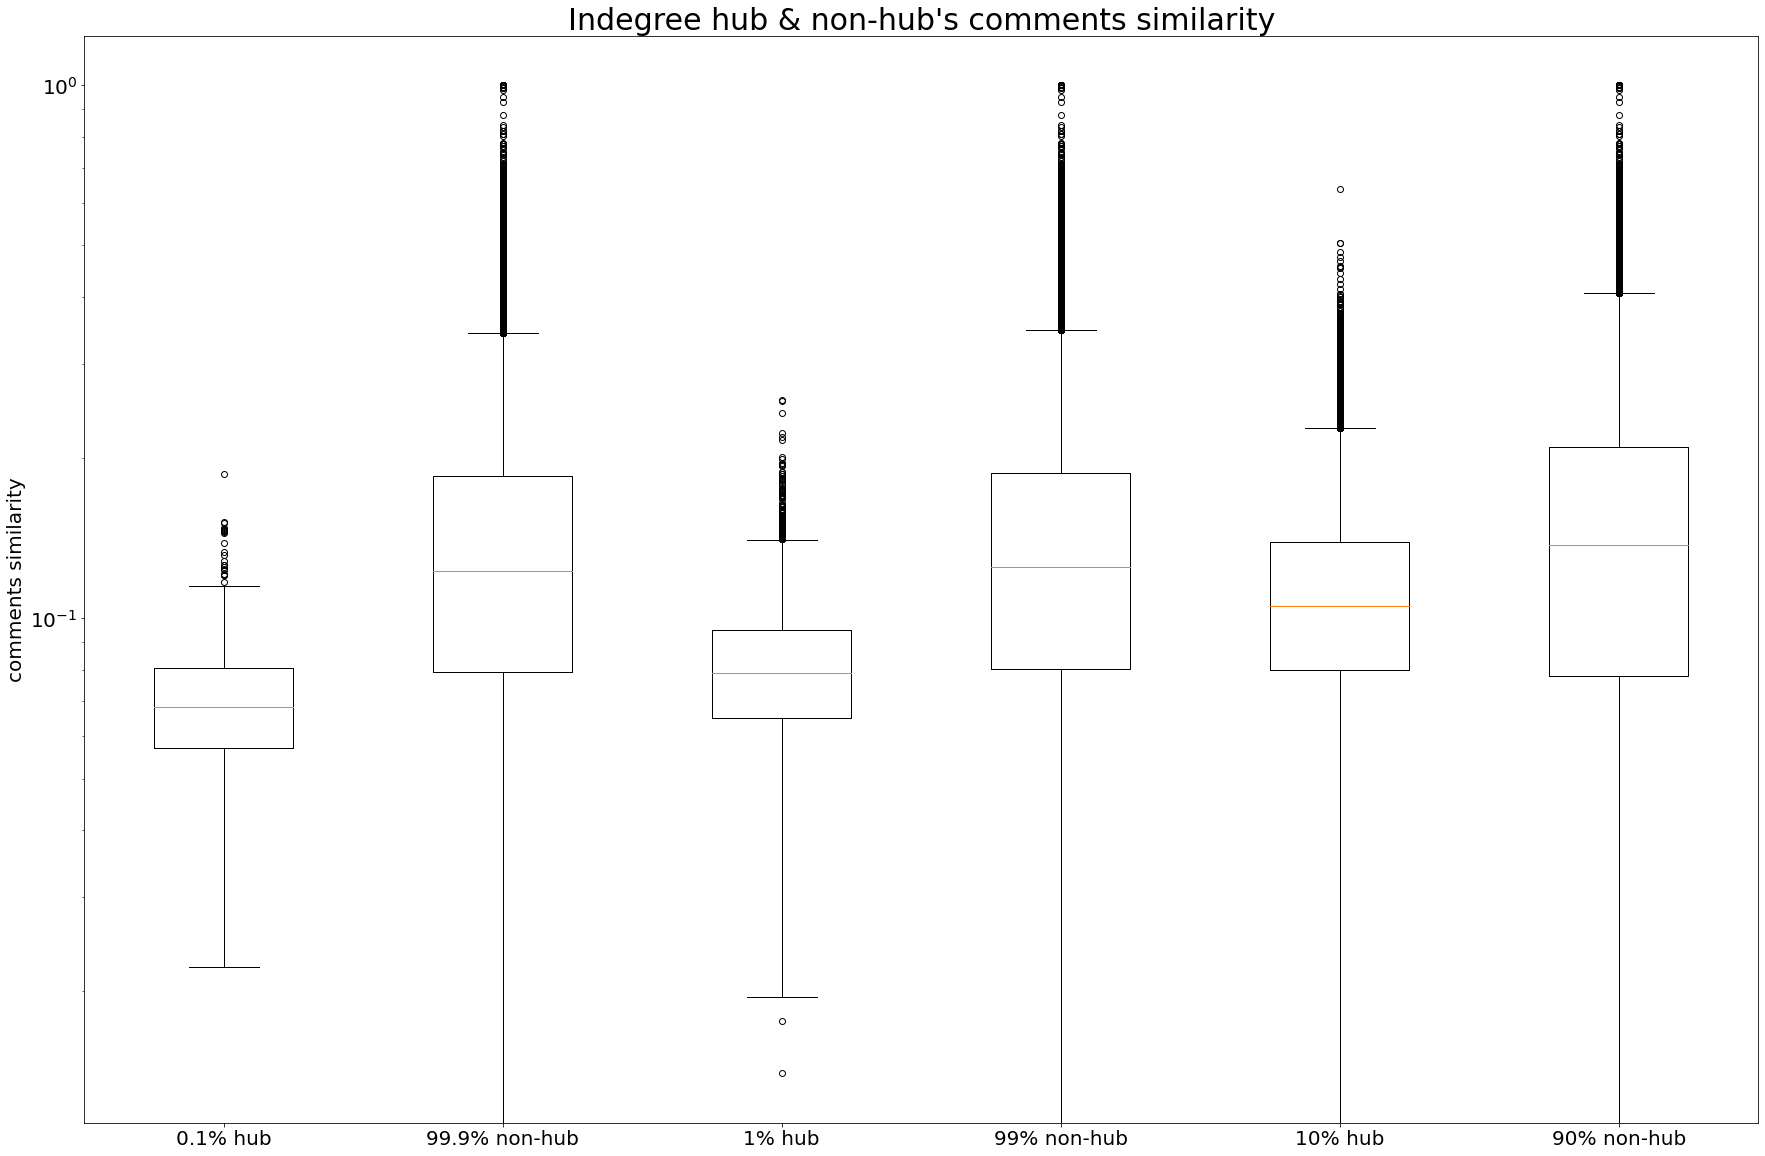

In [142]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's comments similarity", xlabel, 'comments similarity')

# Hub analysis for paper
##  only 0.1%, 1% hub

## Outdegree hub's indegree

In [84]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 1;')
sqls.append('select indegree from nodes where top_k_outdegree > 1;')


for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

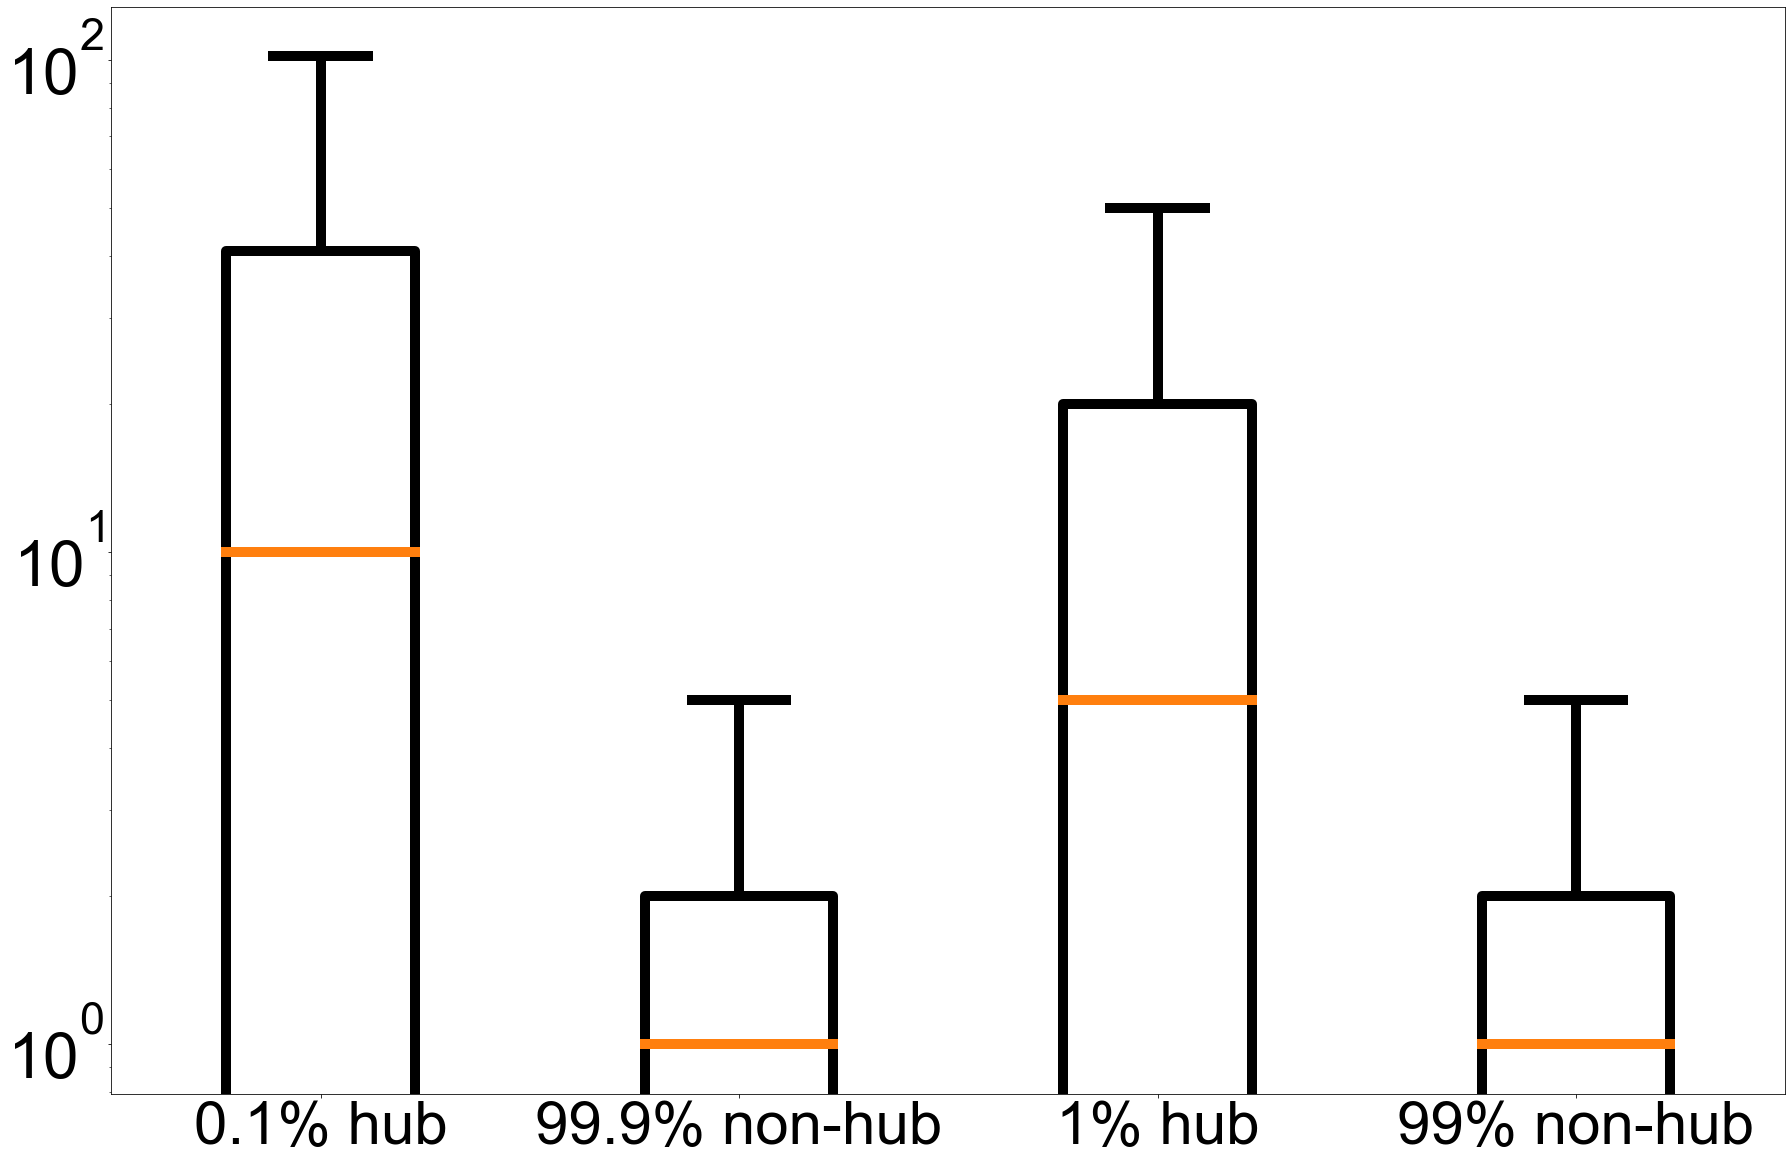

In [86]:
draw_boxplot_for_hub(result_list, "boxplot_indegree_of_outdegree_hub_non_hub", xlabel, 'indegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Indegree hub's outdegree

In [87]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_indegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 1;')
sqls.append('select outdegree from nodes where top_k_indegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

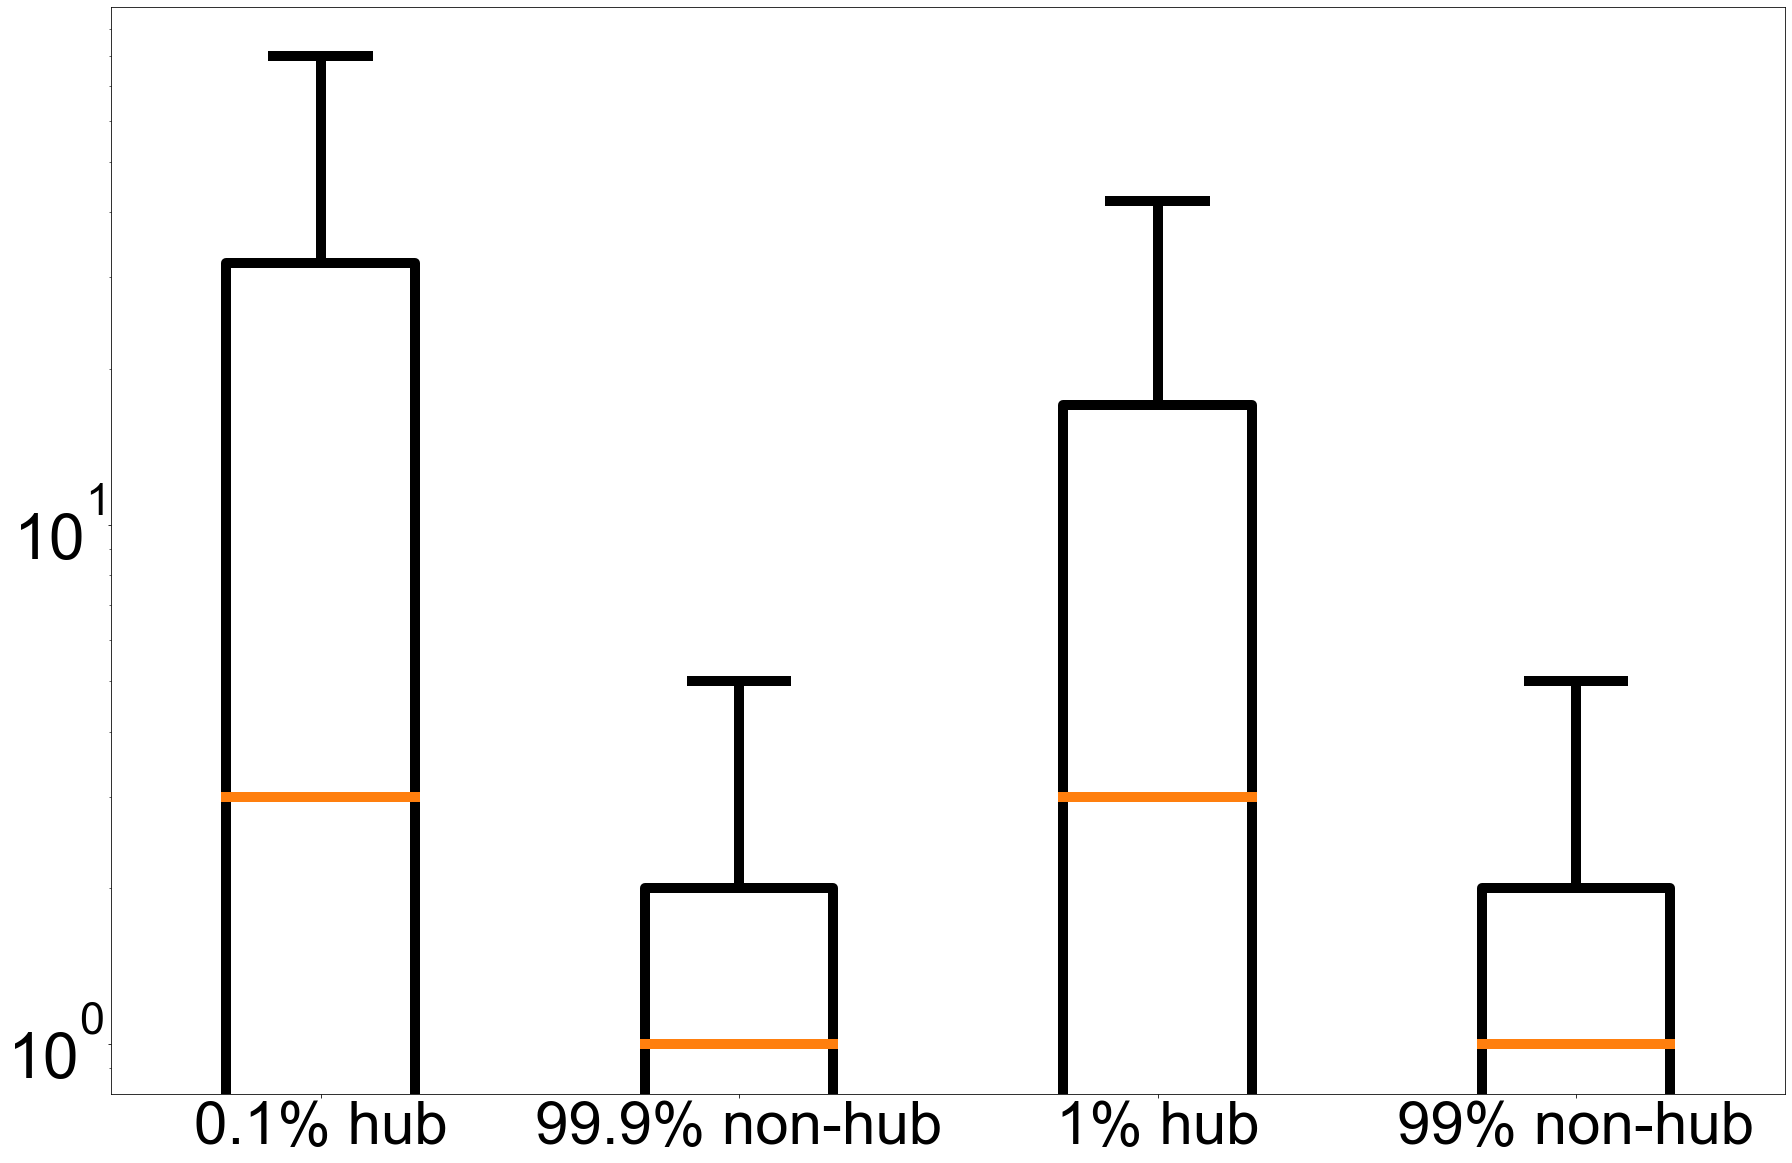

In [88]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "boxplot_outdegree_of_indegree_hub_non_hub", xlabel, 'outdegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Outdegree Hub's posts similarity & comments similarity

In [90]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.posts_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

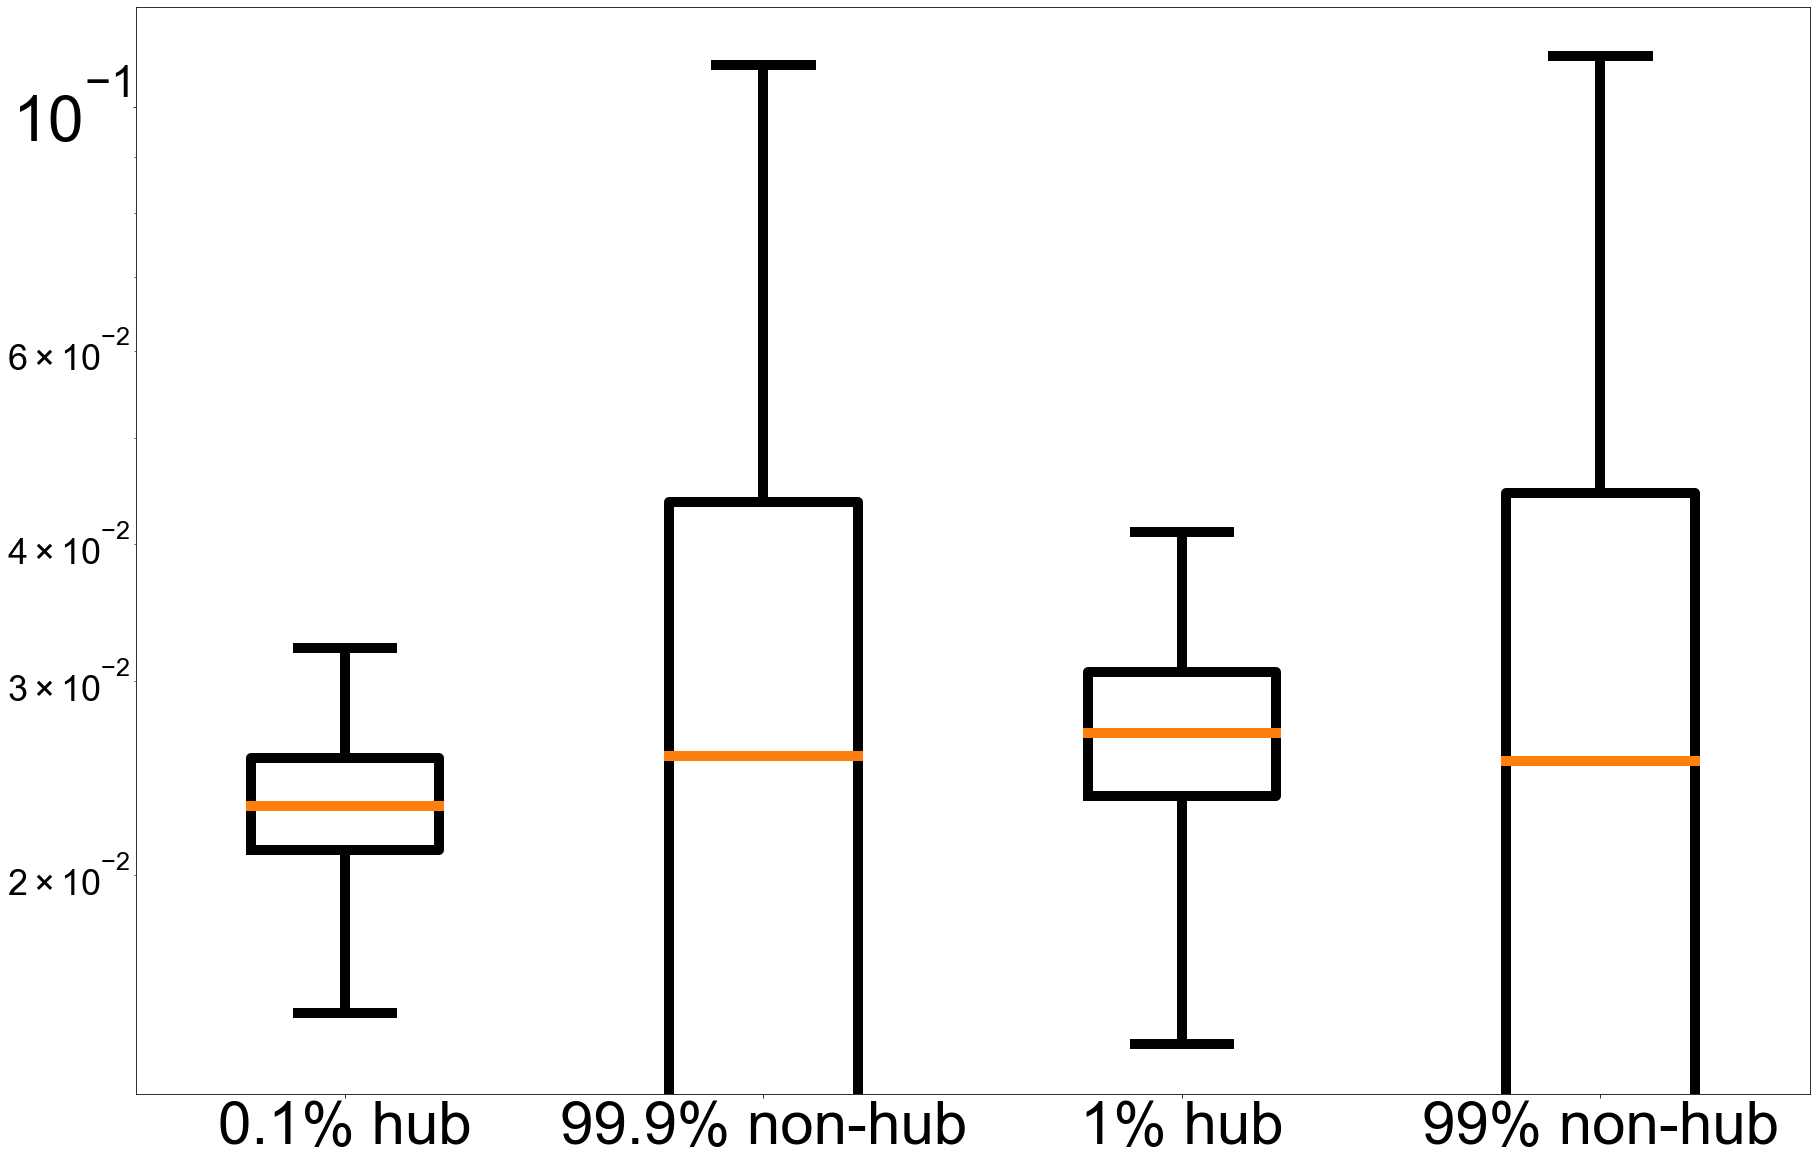

In [91]:
draw_boxplot_for_hub(result_list, "boxplot_post_similarity_of_outdegree_hub_non_hub", xlabel, 'posts similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [92]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.comments_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

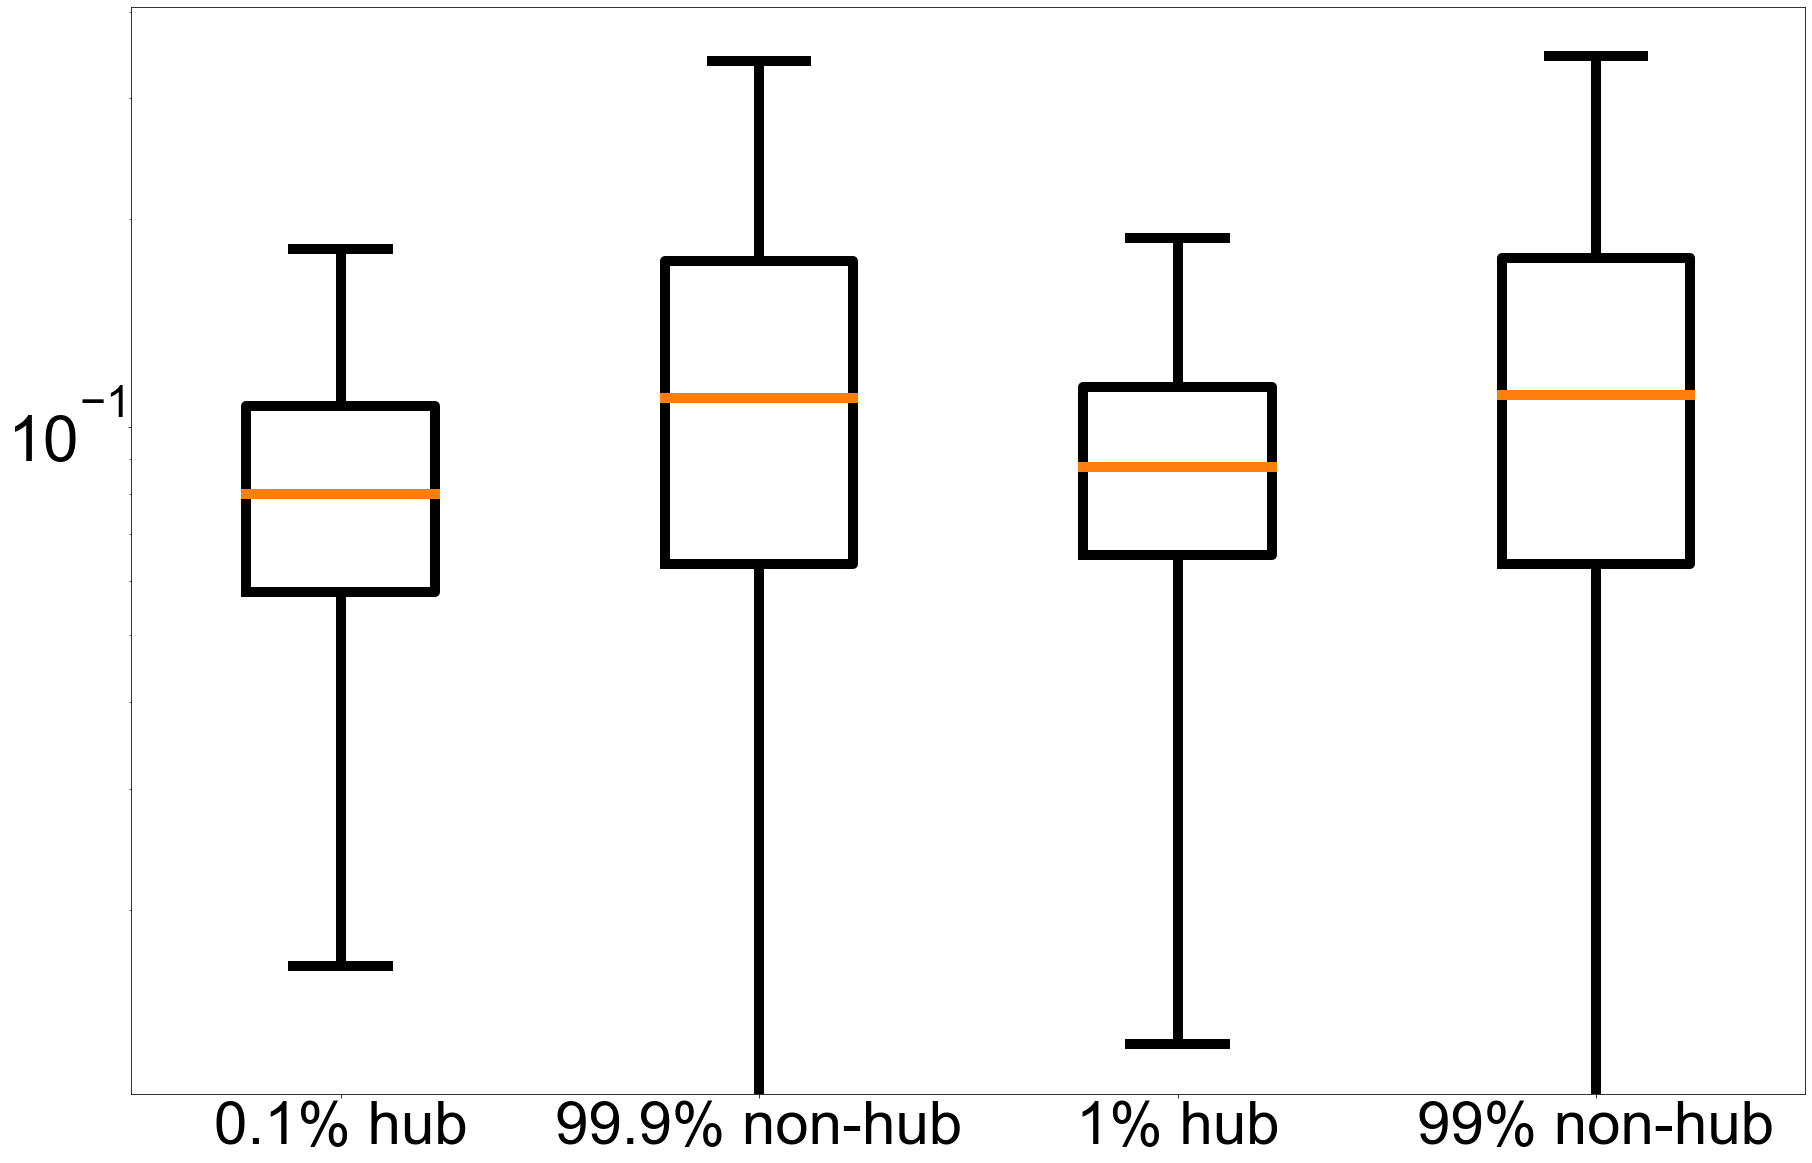

In [93]:
draw_boxplot_for_hub(result_list, "boxplot_comments_similarity_of_outdegree_hub_non_hub", xlabel, 'comments similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Indegree Hub's posts similarity & comments similarity & post count

In [94]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.posts_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

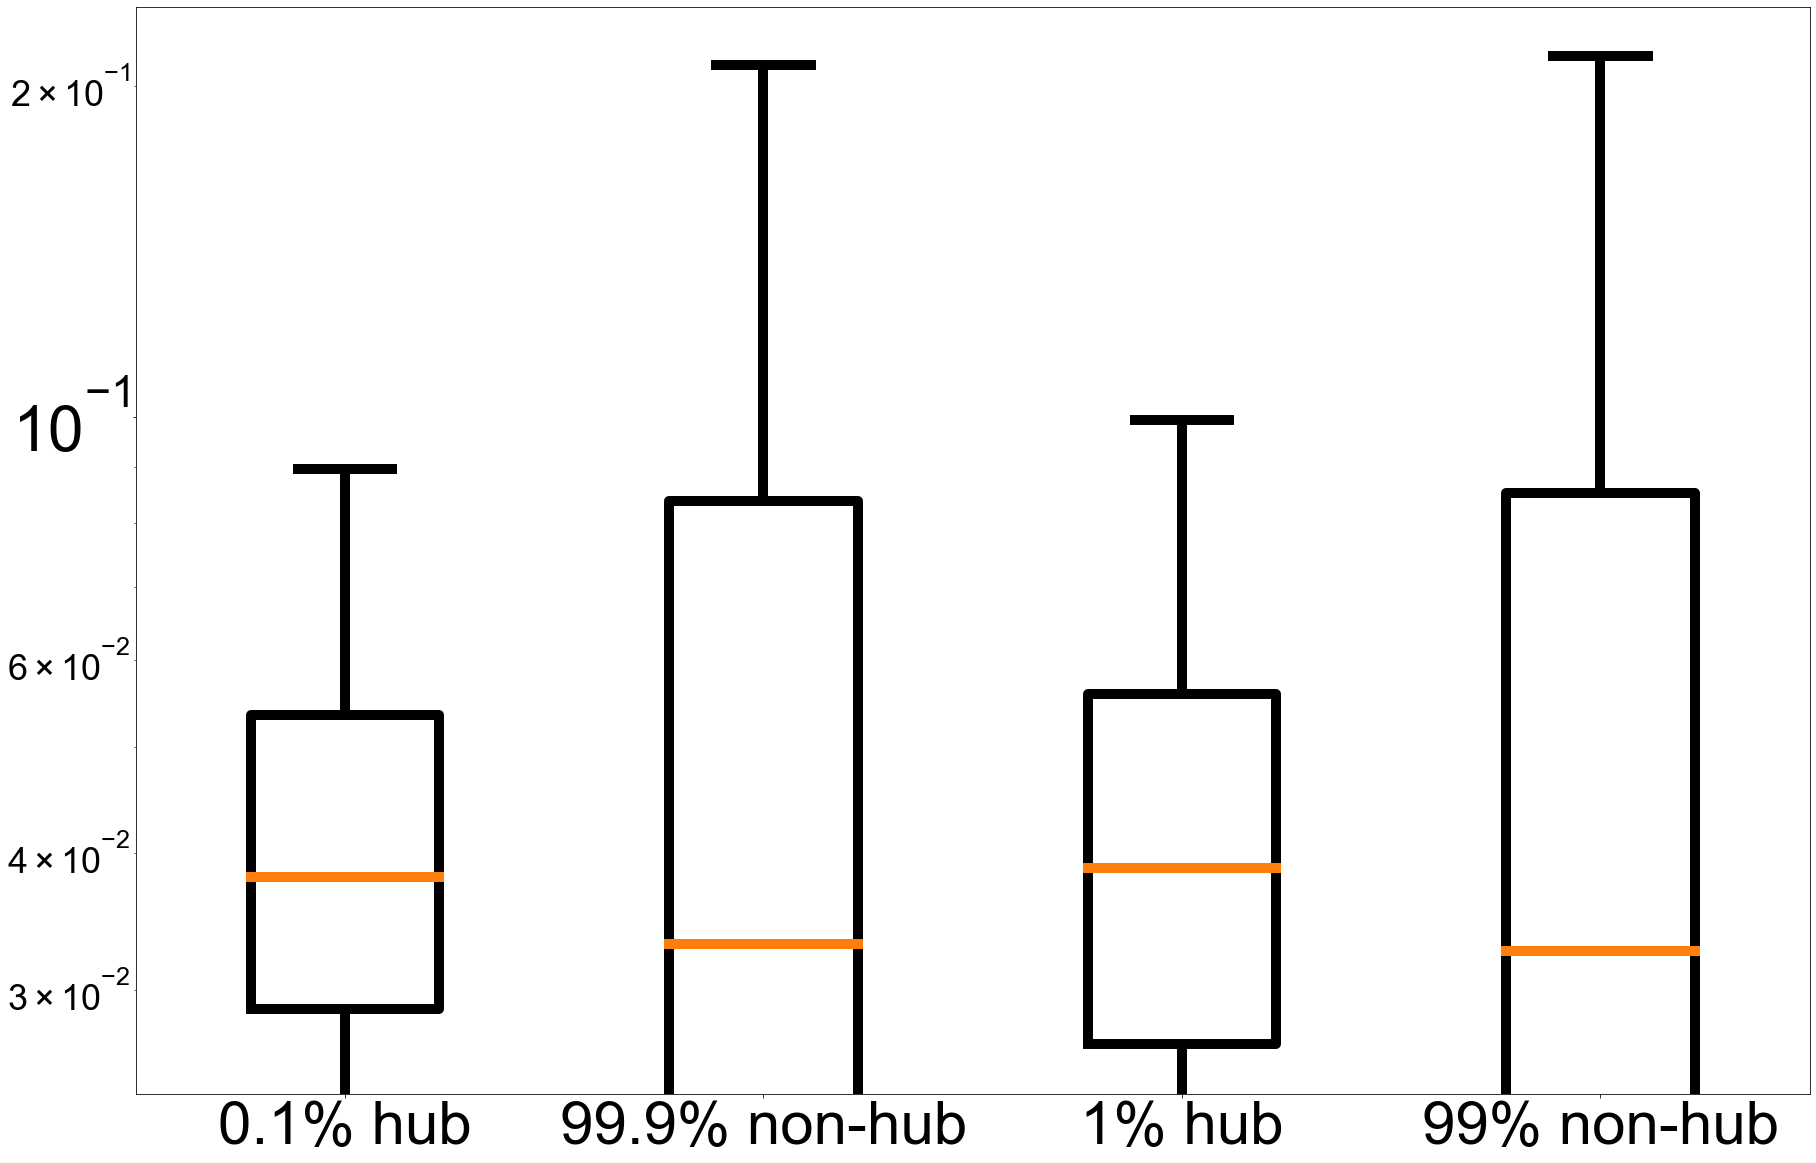

In [95]:
draw_boxplot_for_hub(result_list, "boxplot_posts_similarity_of_indegree_hub_non_hub", xlabel, 'posts similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [96]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.comments_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

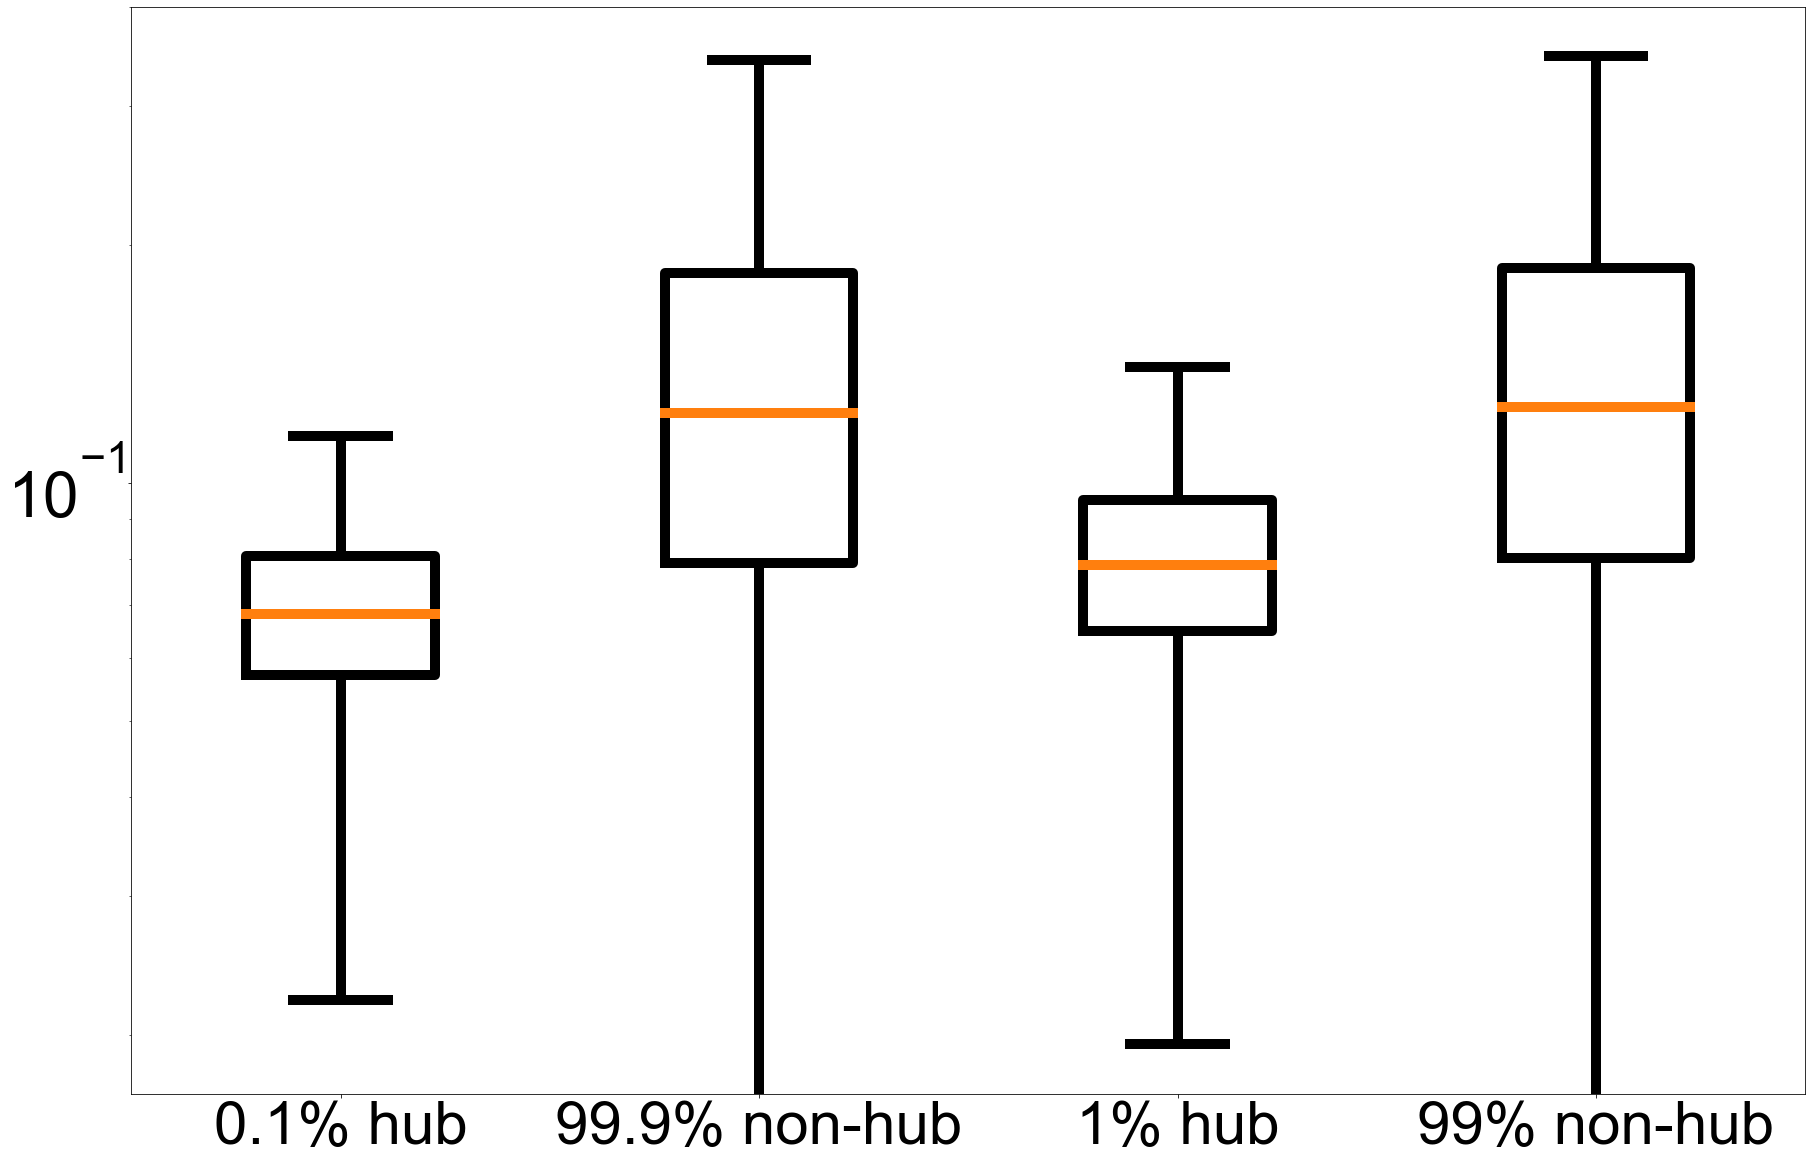

In [97]:
draw_boxplot_for_hub(result_list, "boxplot_comments_similarity_of_indegree_hub_non_hub", xlabel, 'comments similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [98]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['post_cnt'].tolist())))

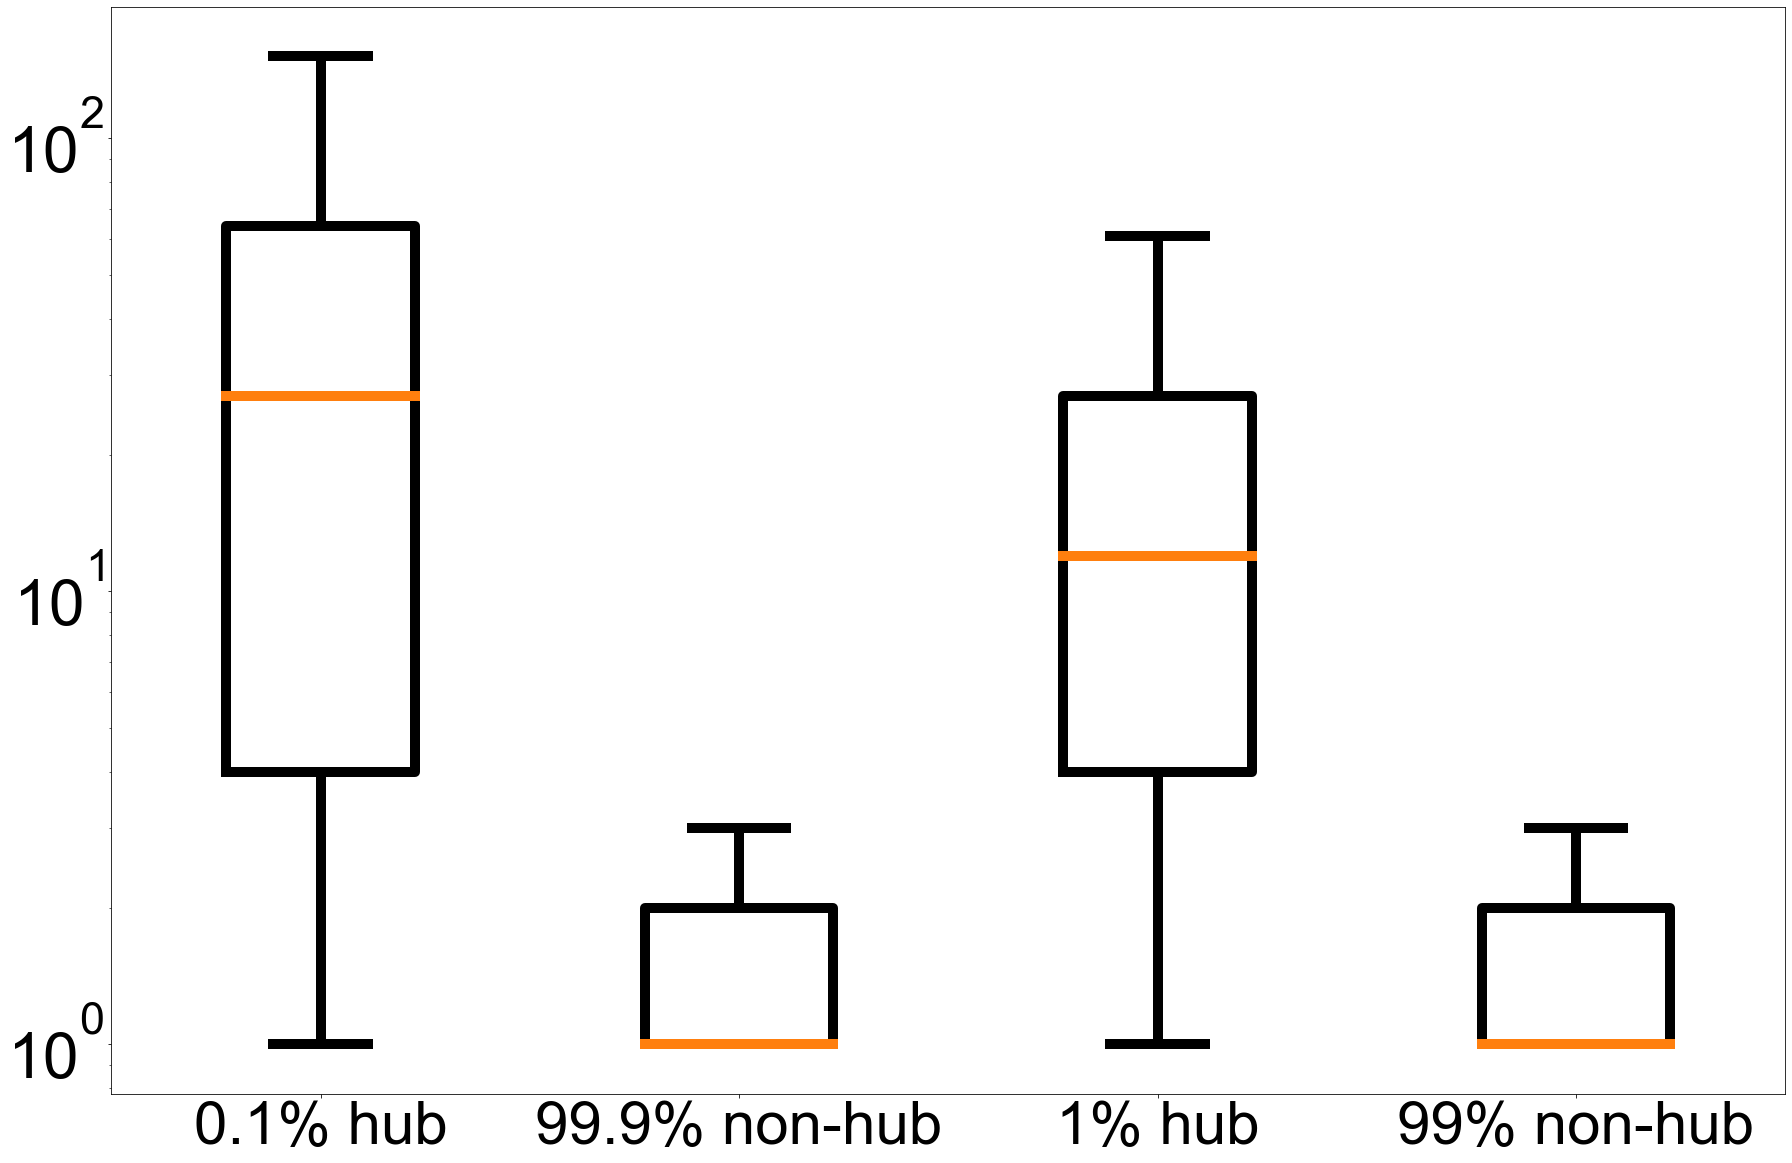

In [99]:
draw_boxplot_for_hub(result_list, "boxplot_post_count_of_indegree_hub_non_hub", xlabel, 'post count', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [74]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree <= 1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

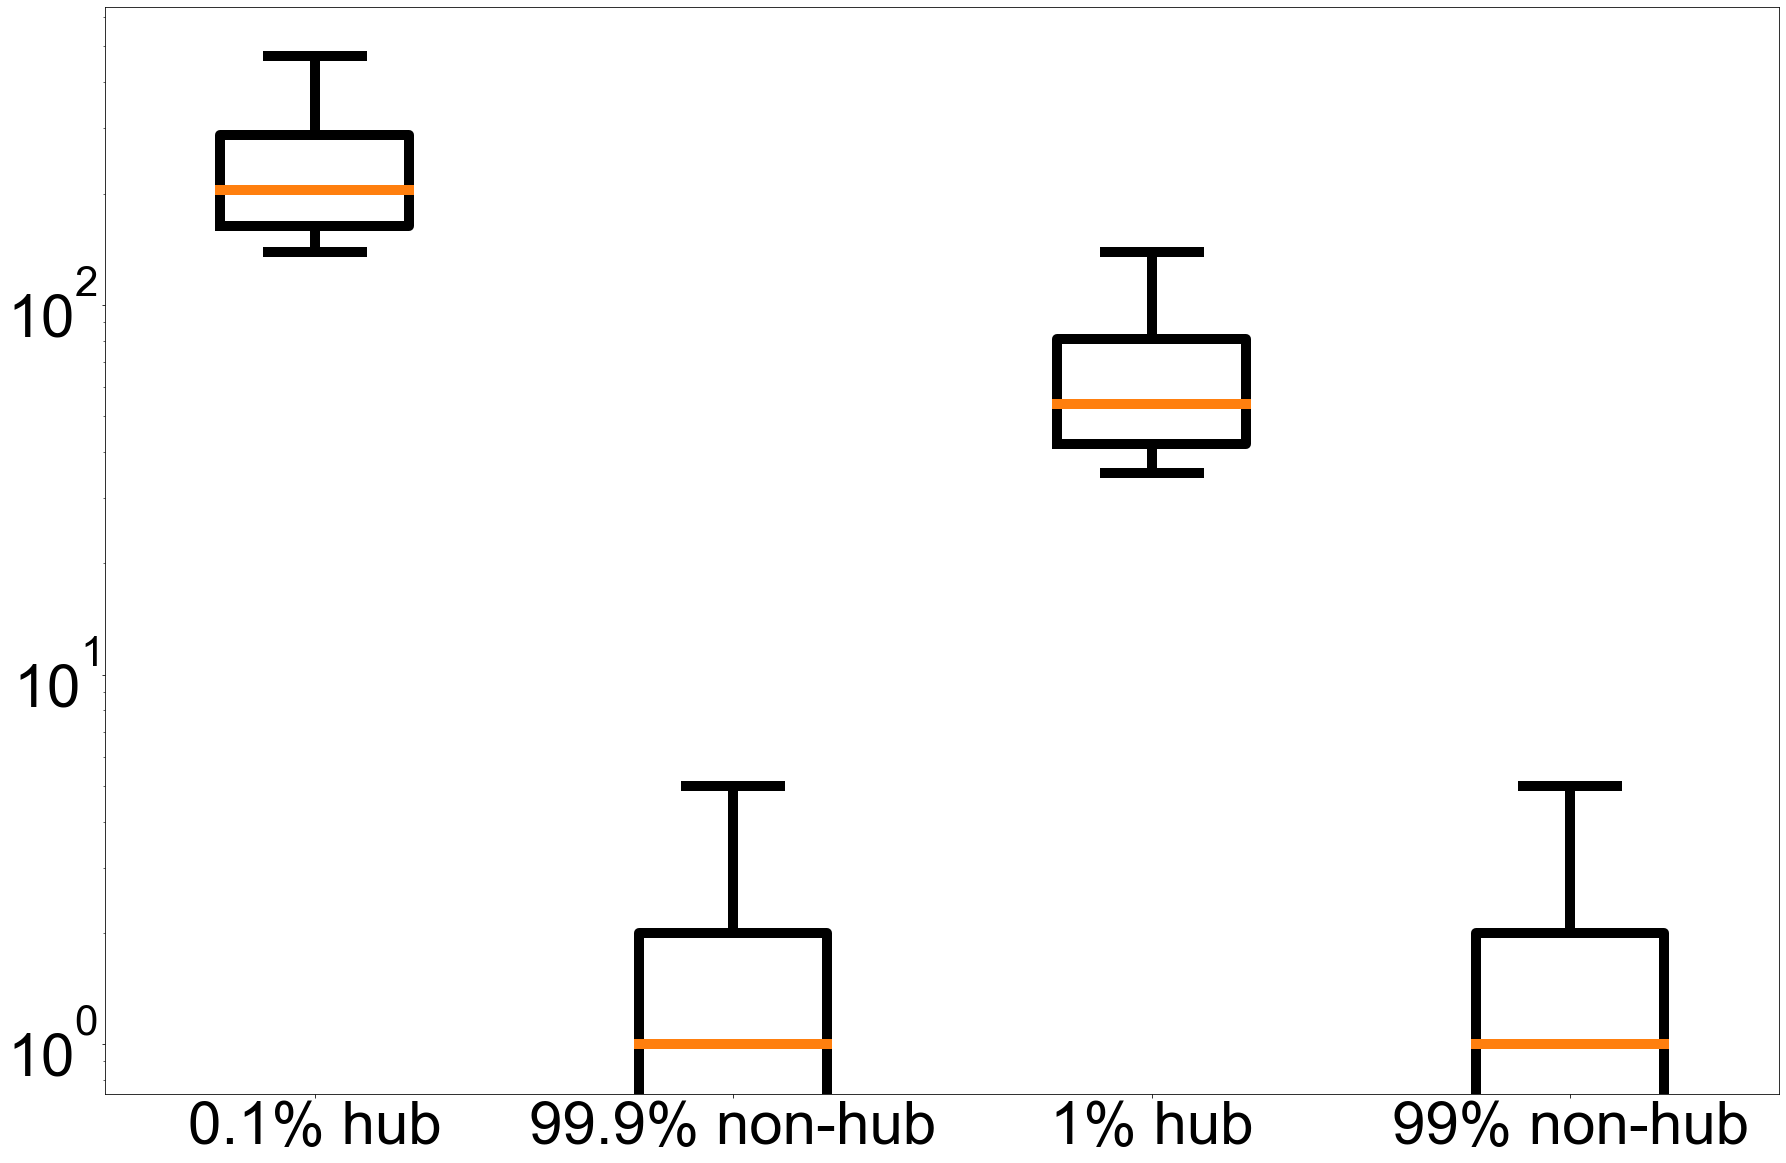

In [79]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "boxplot_outdegree_outdegree_hub_non_hub", xlabel, 'outdegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=60)

In [47]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')


for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(0, 4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    
for i in range(4, 8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

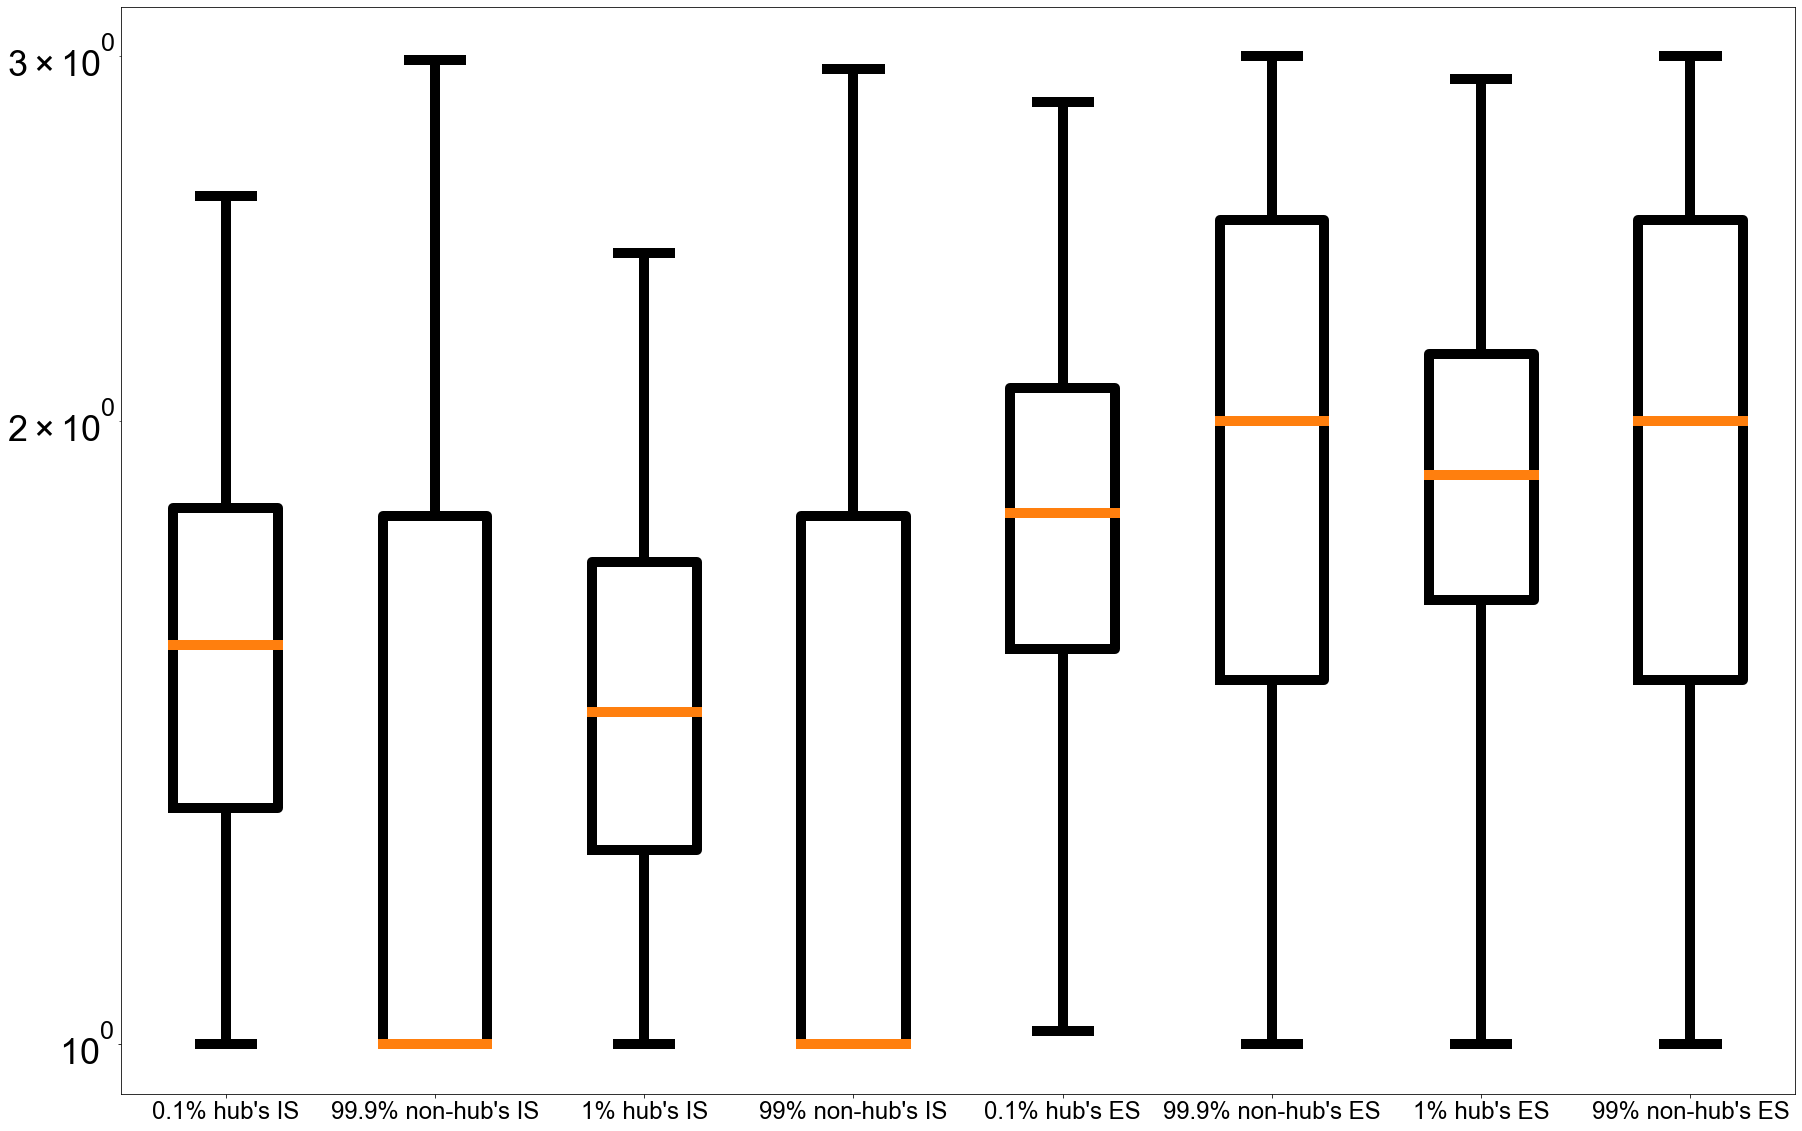

In [66]:
xlabel = ["0.1% hub's IS", "99.9% non-hub's IS", "1% hub's IS", "99% non-hub's IS", "0.1% hub's ES", "99.9% non-hub's ES", "1% hub's ES", "99% non-hub's ES"]
draw_boxplot_for_hub(result_list, "boxplot_average_is_es_outdegree_hub_non_hub", xlabel, 'average score', [1, 2, 3, 4, 5, 6, 7, 8], 24)

In [185]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')

for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    
    if i % 2 == 0:
        # is score.
        result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    else:
        # es score.
        result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

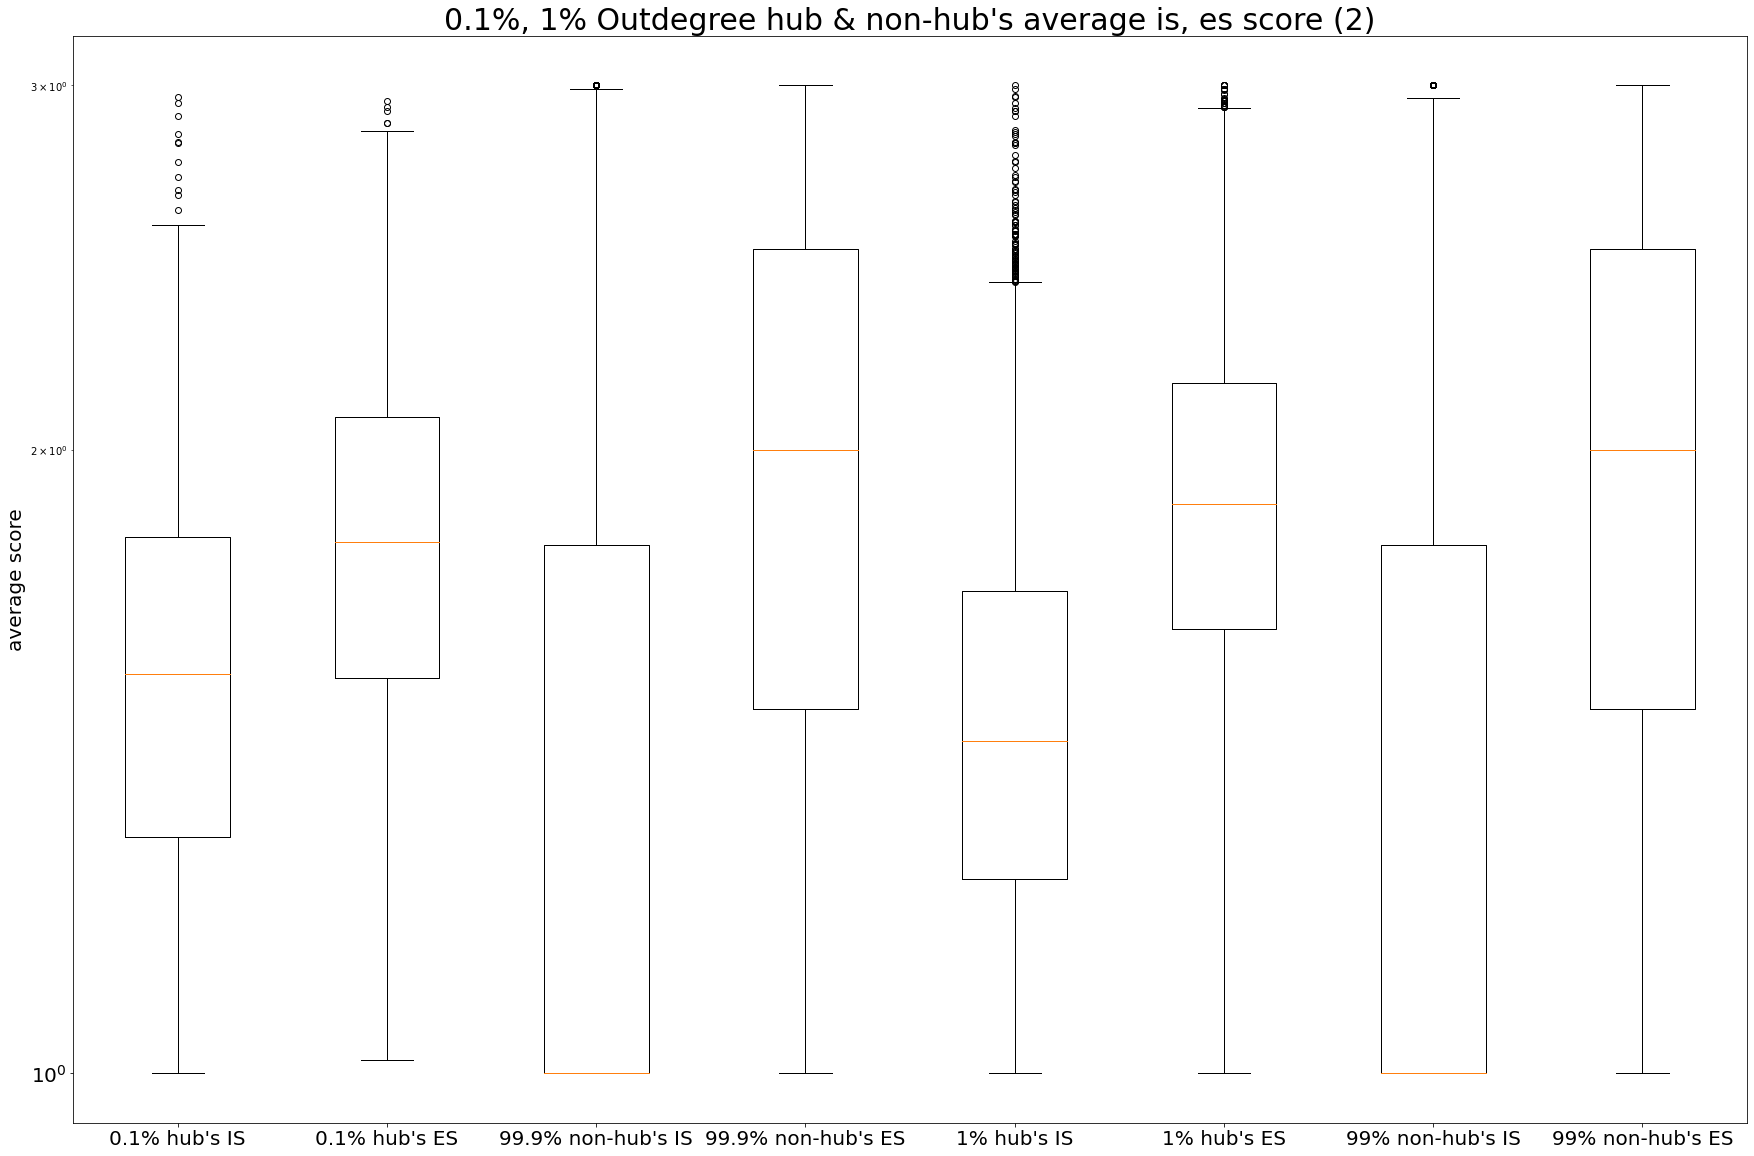

In [186]:
xlabel = ["0.1% hub's IS", "0.1% hub's ES", "99.9% non-hub's IS", "99.9% non-hub's ES", "1% hub's IS", "1% hub's ES", "99% non-hub's IS", "99% non-hub's ES"]
draw_boxplot_for_hub(result_list, "0.1%, 1% Outdegree hub & non-hub's average is, es score (2)", xlabel, 'average score', [1, 2, 3, 4, 5, 6, 7, 8])

In [157]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

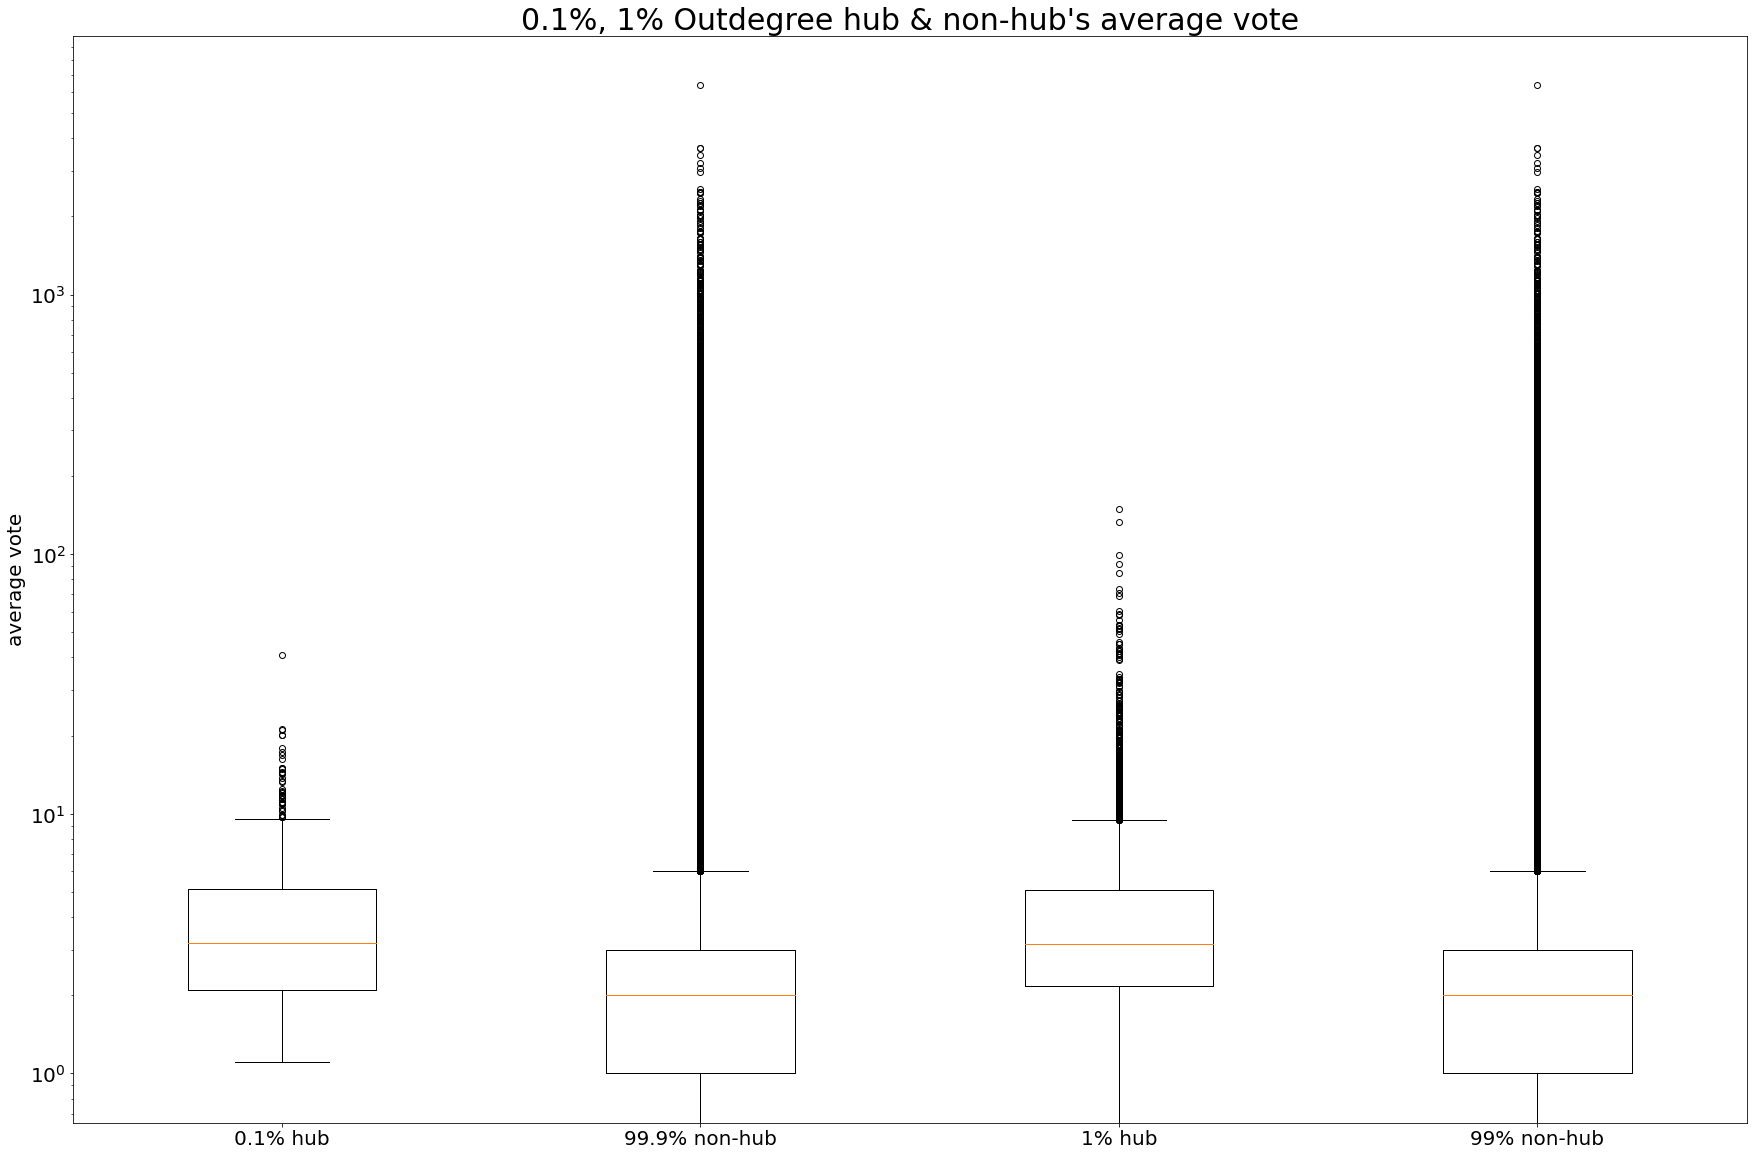

In [158]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "0.1%, 1% Outdegree hub & non-hub's average vote", xlabel, 'average vote', [1, 2, 3, 4])

In [168]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')


for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(0, 4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    
for i in range(4, 8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

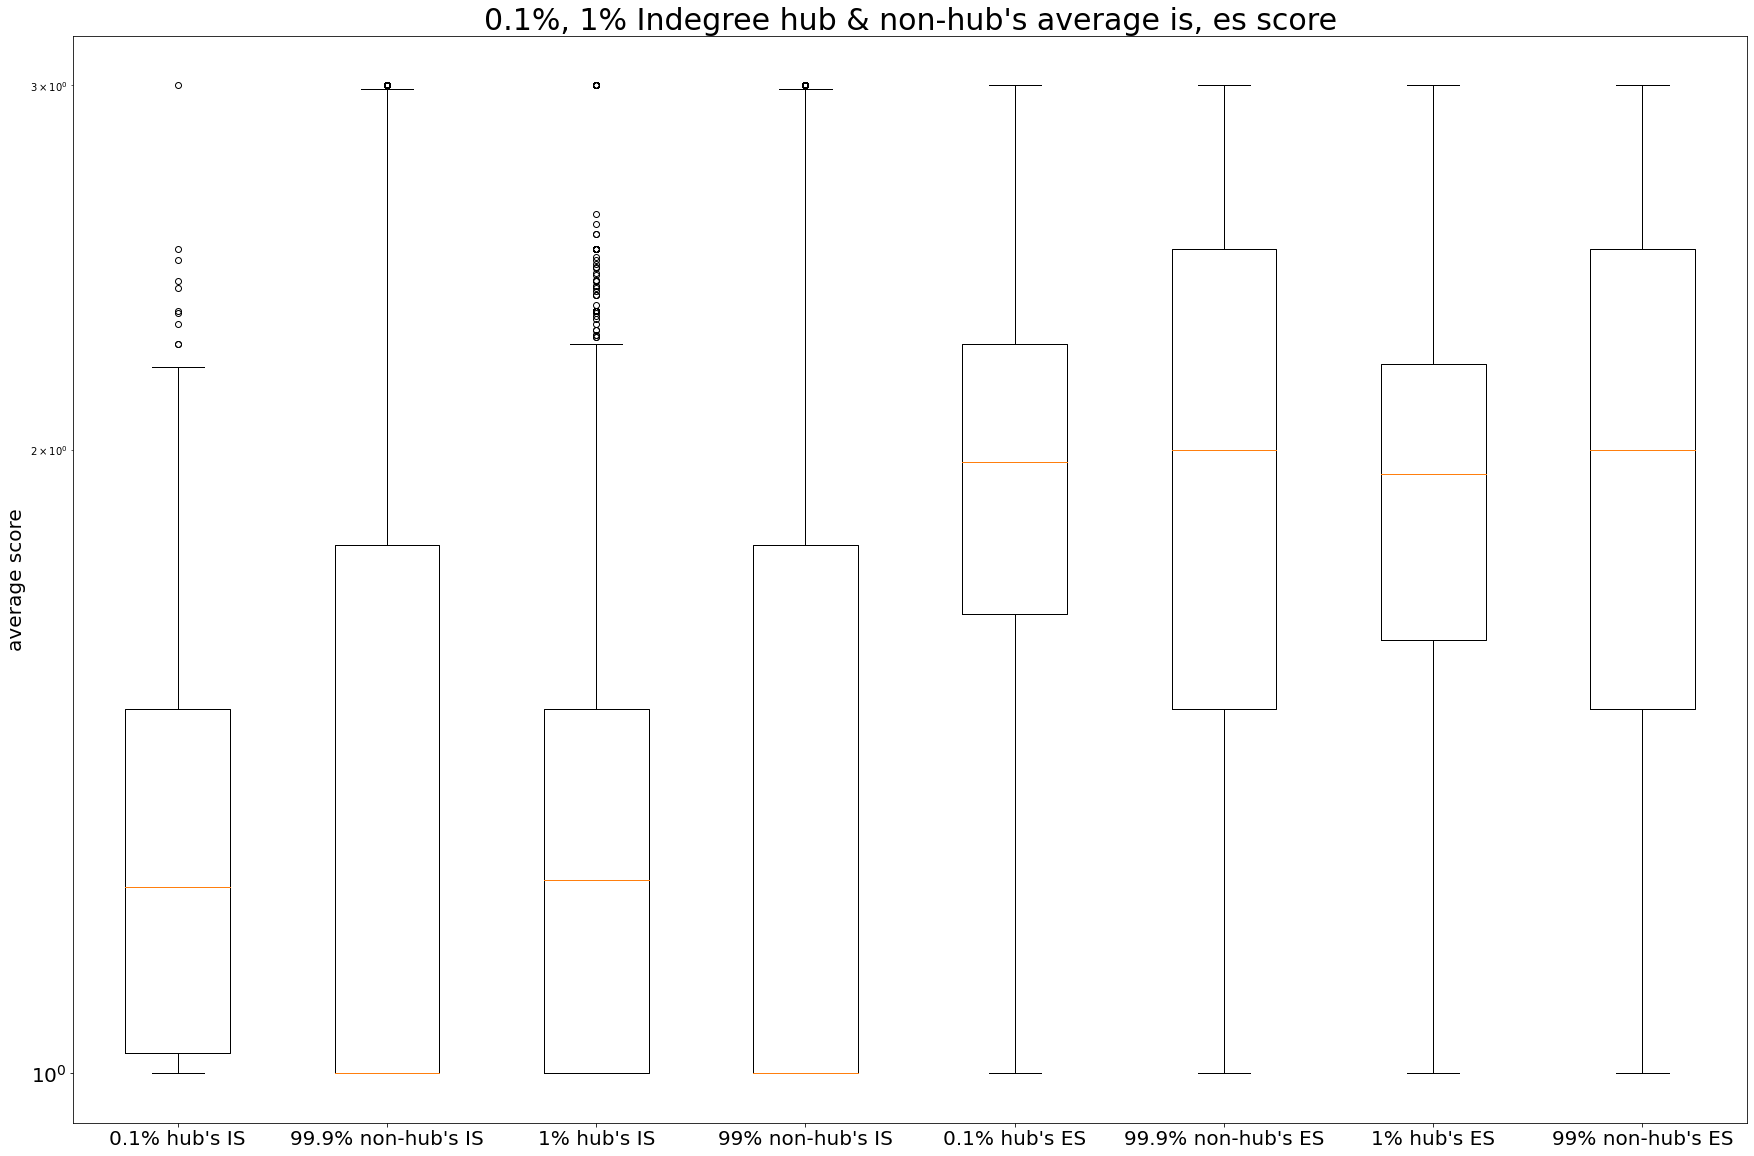

In [169]:
xlabel = ["0.1% hub's IS", "99.9% non-hub's IS", "1% hub's IS", "99% non-hub's IS", "0.1% hub's ES", "99.9% non-hub's ES", "1% hub's ES", "99% non-hub's ES"]
draw_boxplot_for_hub(result_list, "0.1%, 1% Indegree hub & non-hub's average is, es score", xlabel, 'average score', [1, 2, 3, 4, 5, 6, 7, 8])

In [187]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')

for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    
    if i % 2 == 0:
        # is score.
        result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    else:
        # es score.
        result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

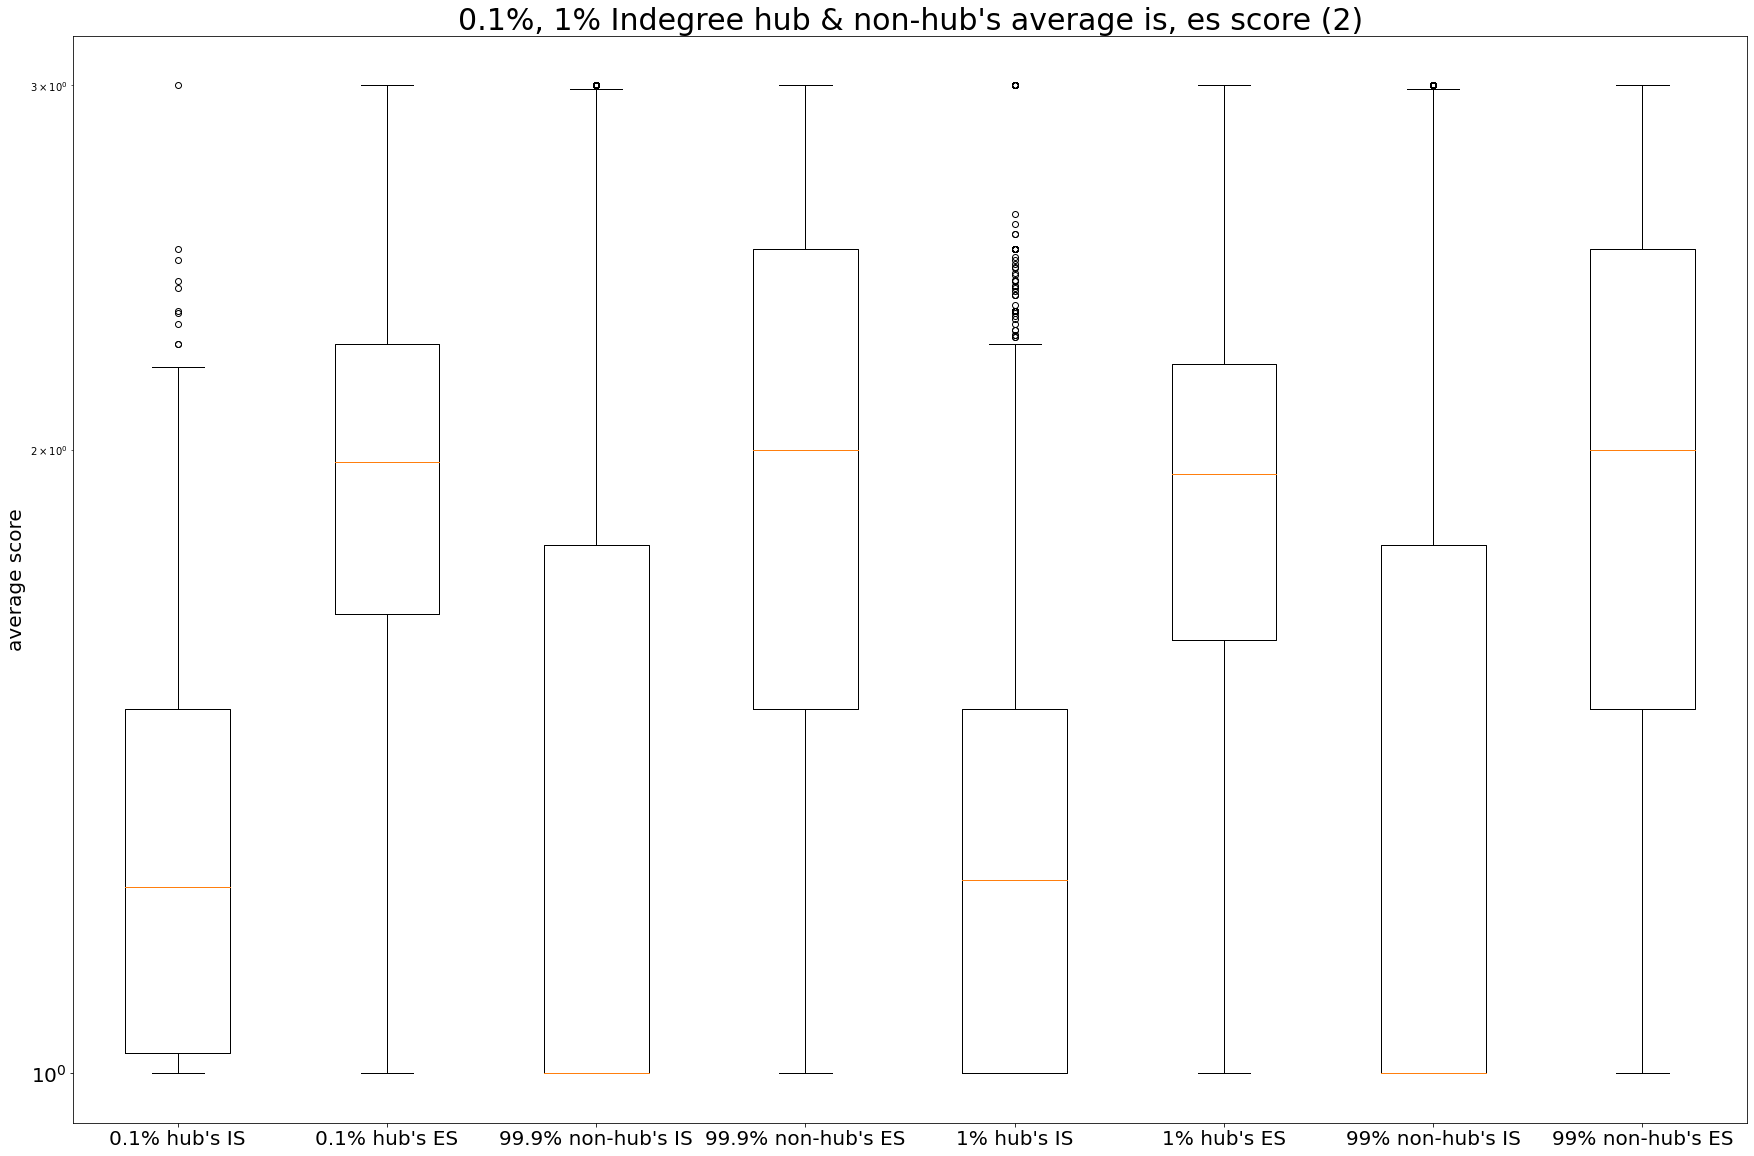

In [188]:
xlabel = ["0.1% hub's IS", "0.1% hub's ES", "99.9% non-hub's IS", "99.9% non-hub's ES", "1% hub's IS", "1% hub's ES", "99% non-hub's IS", "99% non-hub's ES"]
draw_boxplot_for_hub(result_list, "0.1%, 1% Indegree hub & non-hub's average is, es score (2)", xlabel, 'average score', [1, 2, 3, 4, 5, 6, 7, 8])

In [170]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_comments_vote is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_comments_vote'].tolist())))

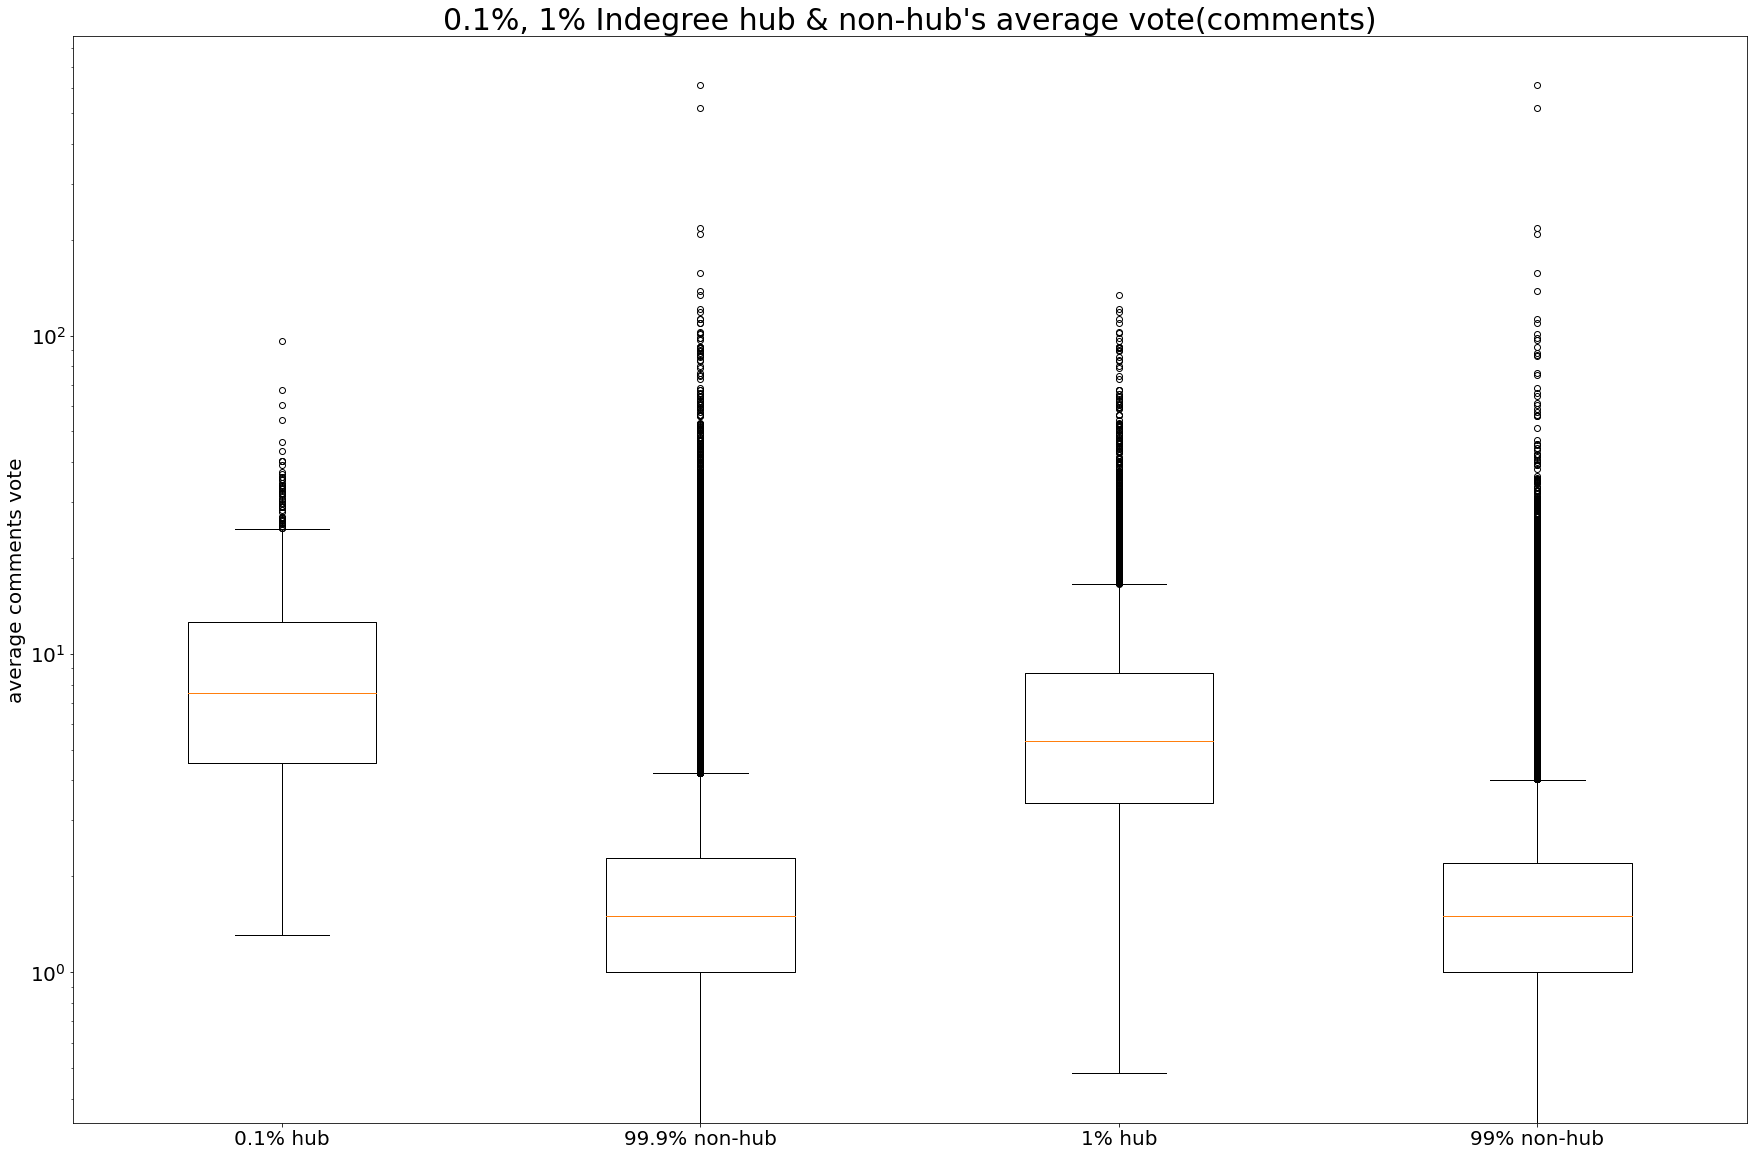

In [171]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "0.1%, 1% Indegree hub & non-hub's average vote(comments)", xlabel, 'average comments vote', [1, 2, 3, 4])